<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-0:-Get-to-Know-the-Data" data-toc-modified-id="Part-0:-Get-to-Know-the-Data-1">Part 0: Get to Know the Data</a></span><ul class="toc-item"><li><span><a href="#Initial-Inspection" data-toc-modified-id="Initial-Inspection-1.1">Initial Inspection</a></span></li><li><span><a href="#Addressing-Error-Returned-When-Reading-In-Data-(Mixed-Data-Types)" data-toc-modified-id="Addressing-Error-Returned-When-Reading-In-Data-(Mixed-Data-Types)-1.2">Addressing Error Returned When Reading In Data (Mixed Data Types)</a></span></li><li><span><a href="#Check-data-types-in-Dataframes" data-toc-modified-id="Check-data-types-in-Dataframes-1.3">Check data types in Dataframes</a></span></li><li><span><a href="#Check-for-non-matching-Data-between-2-Dataframes" data-toc-modified-id="Check-for-non-matching-Data-between-2-Dataframes-1.4">Check for non-matching Data between 2 Dataframes</a></span></li><li><span><a href="#NaN-Values-in-the-Dataframes" data-toc-modified-id="NaN-Values-in-the-Dataframes-1.5">NaN Values in the Dataframes</a></span></li><li><span><a href="#Fill-NaN-values" data-toc-modified-id="Fill-NaN-values-1.6">Fill NaN values</a></span></li><li><span><a href="#Get-Dummy-Variables" data-toc-modified-id="Get-Dummy-Variables-1.7">Get Dummy Variables</a></span></li></ul></li><li><span><a href="#Part-1:-Customer-Segmentation-Report" data-toc-modified-id="Part-1:-Customer-Segmentation-Report-2">Part 1: Customer Segmentation Report</a></span><ul class="toc-item"><li><span><a href="#Dimension-reduction-with-PCA" data-toc-modified-id="Dimension-reduction-with-PCA-2.1">Dimension reduction with PCA</a></span></li><li><span><a href="#Determine-number-of-clusters-with-K-Means-clustering" data-toc-modified-id="Determine-number-of-clusters-with-K-Means-clustering-2.2">Determine number of clusters with K-Means clustering</a></span></li><li><span><a href="#Process-the-full-population-and-customers-data-and-predict" data-toc-modified-id="Process-the-full-population-and-customers-data-and-predict-2.3">Process the full population and customers data and predict</a></span></li><li><span><a href="#Compare-how-likely-each-cluster-will-be-the-company's-customer" data-toc-modified-id="Compare-how-likely-each-cluster-will-be-the-company's-customer-2.4">Compare how likely each cluster will be the company's customer</a></span></li></ul></li><li><span><a href="#Part-2:-Supervised-Learning-Model" data-toc-modified-id="Part-2:-Supervised-Learning-Model-3">Part 2: Supervised Learning Model</a></span><ul class="toc-item"><li><span><a href="#Inspection-and-cleaning" data-toc-modified-id="Inspection-and-cleaning-3.1">Inspection and cleaning</a></span></li><li><span><a href="#Issue-with-low-positive-results" data-toc-modified-id="Issue-with-low-positive-results-3.2">Issue with low positive results</a></span></li><li><span><a href="#Increase-positive-prediction-with-oversampling" data-toc-modified-id="Increase-positive-prediction-with-oversampling-3.3">Increase positive prediction with oversampling</a></span></li><li><span><a href="#Search-for-most-effective-model" data-toc-modified-id="Search-for-most-effective-model-3.4">Search for most effective model</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.4.1">Logistic regression</a></span></li><li><span><a href="#Adaboost-classifier" data-toc-modified-id="Adaboost-classifier-3.4.2">Adaboost classifier</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.4.3">Naive Bayes</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-3.4.4">SVC</a></span></li><li><span><a href="#Best-model-conclusion" data-toc-modified-id="Best-model-conclusion-3.4.5">Best model conclusion</a></span></li><li><span><a href="#Model-evaluation-and-validation" data-toc-modified-id="Model-evaluation-and-validation-3.4.6">Model evaluation and validation</a></span></li></ul></li></ul></li><li><span><a href="#Part-3:-Kaggle-Competition" data-toc-modified-id="Part-3:-Kaggle-Competition-4">Part 3: Kaggle Competition</a></span><ul class="toc-item"><li><span><a href="#Inspect-and-clean" data-toc-modified-id="Inspect-and-clean-4.1">Inspect and clean</a></span></li><li><span><a href="#Predicting-and-generate-files-for-submissions" data-toc-modified-id="Predicting-and-generate-files-for-submissions-4.2">Predicting and generate files for submissions</a></span></li></ul></li></ul></div>

# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Note: Jupyter Notebook created using Monokai dark theme from JupyterThemes package
# The below will set up styles for plots for viewability on a dark background
from jupyterthemes import jtplot
jtplot.style('monokai')

from IPython.display import Audio

# Define sound to play when long computation is completed
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [3]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

# Load data downloaded from Udacity's server
azdias = pd.read_csv('azdias.csv')
customers = pd.read_csv('customers.csv')

C:\Users\chron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Drop the index column from the CSV
azdias = azdias.drop(columns='Unnamed: 0')
customers = customers.drop(columns='Unnamed: 0')

### Initial Inspection 

Firstly, we quickly inspect the azdias dataframe:

In [5]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [6]:
azdias.shape

(891221, 366)

In [7]:
# Confirm no duplicate data
azdias.duplicated().sum()

0

Based on the above, we confirm that the azdias dataframe consists of 891,221 entries of samples of the German population with 366 features.

Next, let us inspect the customers dataframe. Based on the data descriptions, we would expect that the customers dataframe should have all the features found in azdias along with additional features that identify the type of customers:

In [8]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [9]:
customers.shape

(191652, 369)

In [10]:
# Confirm no duplicate data
customers.duplicated().sum()

0

The customers dataframe does indeed have 3 more columns than the azdias dataframe. Let us do a quick check that the columns line up and the 3 additional columns are unique to the customers dataframe:

In [11]:
col_not_in = []

for col in list(customers.columns):
    if col not in list(azdias.columns):
        col_not_in.append(col)

col_not_in

['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']

This does seem to be the case.

I also inspect the unique values in the 3 extra columns in the customers dataframe:

In [12]:
customers.groupby('PRODUCT_GROUP')['LNR'].count()

PRODUCT_GROUP
COSMETIC              43410
COSMETIC_AND_FOOD    100860
FOOD                  47382
Name: LNR, dtype: int64

In [13]:
customers.groupby('CUSTOMER_GROUP')['LNR'].count()

CUSTOMER_GROUP
MULTI_BUYER     132238
SINGLE_BUYER     59414
Name: LNR, dtype: int64

In [14]:
customers.groupby('ONLINE_PURCHASE')['LNR'].count()

ONLINE_PURCHASE
0    174356
1     17296
Name: LNR, dtype: int64

Based on product groups, it seems that the retailer sells cosmetic and food products, and record customers that purchases either or both products. Customers are also divided into multi- and single-buyers, and whether they have made online purchase or not.

### Addressing Error Returned When Reading In Data (Mixed Data Types)

While reading in the data for azdias, we got the errors that columns number 19 and 20 have mixed types. After dropping the first column previously, these correspond to Columns 18 and 19 respectively. I check which columns these refer to:

In [15]:
azdias.iloc[:, 18:20].head()

,CAMEO_DEUG_2015,CAMEO_INTL_2015
0,NaN,NaN
1,8,51
2,4,24
3,2,12
4,6,43


CAMEO_DEUG_2015 and CAMEO_INTL_2015 are the columns in question. Let's check what the issue is by checking its unique values:

In [16]:
azdias['CAMEO_DEUG_2015'].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

In [17]:
azdias['CAMEO_INTL_2015'].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
      dtype=object)

It appears that the data for both columns are a mix of numbers and strings.

It is noted that CAMEO_DEUG_2015 and CAMEO_INTL_2015 contain values of X and XX respectively, where the meaning is not quite clear, as they are not listed in the documentation. Let us check those rows:

In [18]:
azdias[azdias['CAMEO_DEUG_2015'] == 'X']

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
2511,880176,-1,1.0,15.0,NaN,NaN,NaN,NaN,15.0,1.0,...,NaN,3.0,6.0,6.0,3.0,6.0,2.0,2,2,2
4569,226236,-1,5.0,0.0,NaN,NaN,NaN,NaN,14.0,1.0,...,NaN,3.0,6.0,6.0,3.0,9.0,5.0,2,2,3
9803,507931,2,5.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,4.0,6.0,3.0,6.0,9.0,3.0,1,2,4
16700,641123,3,4.0,0.0,NaN,NaN,NaN,NaN,11.0,1.0,...,4.0,8.0,4.0,2.0,3.0,9.0,3.0,3,2,3
16883,390003,2,3.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,5.0,6.0,3.0,6.0,9.0,3.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868148,425718,-1,5.0,19.0,NaN,NaN,NaN,NaN,19.0,9.0,...,1.0,3.0,6.0,7.0,6.0,3.0,4.0,4,2,1
874917,706739,-1,6.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,...,3.0,5.0,8.0,7.0,6.0,3.0,3.0,1,2,1
882189,397531,-1,1.0,19.0,3.0,NaN,NaN,NaN,NaN,1.0,...,4.0,2.0,3.0,9.0,1.0,6.0,4.0,3,2,3
882231,612118,-1,6.0,14.0,NaN,NaN,NaN,NaN,14.0,1.0,...,1.0,7.0,10.0,9.0,4.0,9.0,7.0,3,1,4


In [19]:
azdias[azdias['CAMEO_INTL_2015'] == 'XX']

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
2511,880176,-1,1.0,15.0,NaN,NaN,NaN,NaN,15.0,1.0,...,NaN,3.0,6.0,6.0,3.0,6.0,2.0,2,2,2
4569,226236,-1,5.0,0.0,NaN,NaN,NaN,NaN,14.0,1.0,...,NaN,3.0,6.0,6.0,3.0,9.0,5.0,2,2,3
9803,507931,2,5.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,4.0,6.0,3.0,6.0,9.0,3.0,1,2,4
16700,641123,3,4.0,0.0,NaN,NaN,NaN,NaN,11.0,1.0,...,4.0,8.0,4.0,2.0,3.0,9.0,3.0,3,2,3
16883,390003,2,3.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,5.0,6.0,3.0,6.0,9.0,3.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868148,425718,-1,5.0,19.0,NaN,NaN,NaN,NaN,19.0,9.0,...,1.0,3.0,6.0,7.0,6.0,3.0,4.0,4,2,1
874917,706739,-1,6.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,...,3.0,5.0,8.0,7.0,6.0,3.0,3.0,1,2,1
882189,397531,-1,1.0,19.0,3.0,NaN,NaN,NaN,NaN,1.0,...,4.0,2.0,3.0,9.0,1.0,6.0,4.0,3,2,3
882231,612118,-1,6.0,14.0,NaN,NaN,NaN,NaN,14.0,1.0,...,1.0,7.0,10.0,9.0,4.0,9.0,7.0,3,1,4


It appears that the rows that have X and XX values are the same rows.

We also see that there should be another CAMEO column called CAMEO_DEU_2015. Just to be sure, I look for all columns in the dataframe that has CAMEO in their names.

In [20]:
cameo_cols = [col for col in azdias.columns if 'CAMEO' in col]
print(cameo_cols)

['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015']


Indeed there is another column called CAMEO_DEUG_2015. Let's check the corresponding rows to see if we can get any insight on what the X/XX rows mean:

In [21]:
azdias[azdias['CAMEO_INTL_2015'] == 'XX']['CAMEO_DEU_2015']

2511      XX
4569      XX
9803      XX
16700     XX
16883     XX
          ..
868148    XX
874917    XX
882189    XX
882231    XX
884998    XX
Name: CAMEO_DEU_2015, Length: 373, dtype: object

Looks like those rows show up as XX as well. Let us check what values CAMEO_DEU_2015 take:

In [22]:
azdias['CAMEO_DEU_2015'].unique()

array([nan, '8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D',
       '5C', '8B', '7A', '5D', '9E', '9B', '1B', '3D', '4E', '4B', '3C',
       '5A', '7B', '9A', '6D', '6E', '2C', '7C', '9C', '7D', '5E', '1D',
       '8D', '6C', '6A', '5B', '4D', '3A', '2B', '7E', '3B', '6F', '5F',
       '1C', 'XX'], dtype=object)

It appears that the category names in CAMEO_DEU_2015 are in a number-letter format, so all of them are recorded as strings.

I check whether the customers dataframe has the same issue as well:

In [23]:
customers['CAMEO_INTL_2015'].unique()

array([13.0, nan, 34.0, 24.0, 41.0, 23.0, 15.0, 55.0, 14.0, 22.0, 43.0,
       51.0, 33.0, 25.0, 44.0, 54.0, 32.0, 12.0, 35.0, 31.0, 45.0, 52.0,
       '45', '25', '55', '51', '14', '54', '43', '22', '15', '24', '35',
       '23', '12', '44', '41', '52', '31', '13', '34', '32', '33', 'XX'],
      dtype=object)

In [24]:
customers['CAMEO_DEUG_2015'].unique()

array([1.0, nan, 5.0, 4.0, 7.0, 3.0, 9.0, 2.0, 6.0, 8.0, '6', '3', '8',
       '9', '2', '4', '1', '7', '5', 'X'], dtype=object)

This does seem to be the case.

Based on online documentations on the CAMEO classification, the X or XX classification is used for the unclassified group. I assume it is different to NaN values in that the XX values were actually "classified" by the data provider while NaN indicate that the values are missing.

Since the values are classifications, it does not make sense for them to be integers and converting all the values to string would make more sense. Additionally we should also remove the trailing ".0" so that the same classification will be correctly grouped with the ones that are already stored as strings.

In [25]:
# Create copies for cleaning
azdias_clean = azdias.copy()
customers_clean = customers.copy()

In [26]:
# Convert all entries in the columns to string
azdias_clean['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].astype(str)
azdias_clean['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].astype(str)
customers_clean['CAMEO_DEUG_2015'] = customers['CAMEO_DEUG_2015'].astype(str)
customers_clean['CAMEO_INTL_2015'] = customers['CAMEO_INTL_2015'].astype(str)

# Remove .0 from each entry where applicable
azdias_clean['CAMEO_DEUG_2015'] = azdias_clean['CAMEO_DEUG_2015'].apply(
    lambda x: x.replace('.0', ''))
azdias_clean['CAMEO_INTL_2015'] = azdias_clean['CAMEO_INTL_2015'].apply(
    lambda x: x.replace('.0', ''))
customers_clean['CAMEO_DEUG_2015'] = customers_clean['CAMEO_DEUG_2015'].apply(
    lambda x: x.replace('.0', ''))
customers_clean['CAMEO_INTL_2015'] = customers_clean['CAMEO_INTL_2015'].apply(
    lambda x: x.replace('.0', ''))

In [27]:
# Quick check that data is cleaned as expected
print(azdias_clean['CAMEO_DEUG_2015'].unique())
print(azdias_clean['CAMEO_INTL_2015'].unique())
print(customers_clean['CAMEO_DEUG_2015'].unique())
print(customers_clean['CAMEO_INTL_2015'].unique())

['nan' '8' '4' '2' '6' '1' '9' '5' '7' '3' 'X']
['nan' '51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55'
 '25' '23' '31' '52' '35' '45' '44' '32' 'XX']
['1' 'nan' '5' '4' '7' '3' '9' '2' '6' '8' 'X']
['13' 'nan' '34' '24' '41' '23' '15' '55' '14' '22' '43' '51' '33' '25'
 '44' '54' '32' '12' '35' '31' '45' '52' 'XX']


### Check data types in Dataframes

Now that the issue with mixed data types are addressed, let us check the types of data in the dataframes:

In [28]:
azdias_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


In [29]:
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 369 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(8)
memory usage: 539.5+ MB


Based on the above, it appears that azdias has 267 floating columns, 93 integer columns and 6 string columns. customers has 1 more integer columns and 2 more string columns which are presumably 3 the extra columns of customers. Let us check:

In [30]:
customers_clean[['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PRODUCT_GROUP    191652 non-null  object
 1   CUSTOMER_GROUP   191652 non-null  object
 2   ONLINE_PURCHASE  191652 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ MB


This seems to be the case. Let us check what the 6 string columns are:

In [31]:
azdias_clean.select_dtypes('object').head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,NaN,nan,nan,NaN,NaN,NaN
1,8A,8,51,NaN,1992-02-10 00:00:00,W
2,4C,4,24,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2,12,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,6,43,D19_SCHUHE,1992-02-12 00:00:00,W


The first 3 columns are the CAMEO columns we had seen previously. 2 of the other columns, D19_LETZTER_KAUF_BRANCHE and OST_WEST_KZ, are an indicator of "last purchase branch" and indicator of whether the person is located in the former West or East Germany, respectively. These would seem to have the correct data types for analysis.

The remaining column, EINGEFUEGT_AM, appears to show the date the data was inserted. The data are clearly dates so they should be converted to the appropriate data type:

In [32]:
azdias_clean['EINGEFUEGT_AM'] = pd.to_datetime(azdias_clean['EINGEFUEGT_AM'])
customers_clean['EINGEFUEGT_AM'] = pd.to_datetime(customers_clean['EINGEFUEGT_AM'])

For the remaining numerical data type columns, the key concern would be whether they are categorical data types (such as we have seen with the CAMEO columns), or quantitative data, so that the variables could be encoded correctly for modelling.

Without going through each column, I think the most indicative way would be to check the number of unique values in each column. A column with very high number of unique values are probably more likely to be quantitative data, while those with lower number of unique values are more likely be categorical.

Below are the top 40 columns by number of unique values:

In [33]:
azdias_clean.nunique().sort_values(ascending=False).head(40)

LNR                            891221
EINGEFUEGT_AM                    5162
KBA13_ANZAHL_PKW                 1261
ANZ_HAUSHALTE_AKTIV               292
ANZ_STATISTISCHE_HAUSHALTE        268
GEBURTSJAHR                       117
EXTSEL992                          56
VERDICHTUNGSRAUM                   46
CAMEO_DEU_2015                     45
LP_LEBENSPHASE_FEIN                41
EINGEZOGENAM_HH_JAHR               37
D19_LETZTER_KAUF_BRANCHE           35
MIN_GEBAEUDEJAHR                   32
ANZ_PERSONEN                       30
ALTERSKATEGORIE_FEIN               26
CAMEO_INTL_2015                    23
ALTER_HH                           22
ANZ_HH_TITEL                       21
ALTER_KIND2                        17
ALTER_KIND1                        17
PRAEGENDE_JUGENDJAHRE              16
ALTER_KIND3                        15
VK_DISTANZ                         13
LP_LEBENSPHASE_GROB                13
GFK_URLAUBERTYP                    12
LP_FAMILIE_FEIN                    12
ALTER_KIND4 

The top is LNR which has the same number of unique values as the number of rows, so that is most likely an ID column which can be dropped for analysis. The second is EINGEFUEGT_AM which we previously saw was date added. However, date added should not affect the grouping, so it should be dropped for analysis.

The next columns are as follows:

- KBA13_ANZAHL_PKW is the number of cars within the PLZ8 (a sub-postcode region in Germany), so it is a ***numerical*** feature. 

- ANZ_HAUSHALTE_AKTIV is the number households known in the building so it is a ***numerical*** feature as well.

- ANZ_STATISTISCHE_HAUSHALTE isn't defined in the documentation but appears to be the statistical budgets so likely a ***numerical*** feature.

- GEBURTSJAHR is year of birth so it is a ***numerical*** feature

- EXTSEL992 is not defined in the documentation and the meaning is unclear. Distribution appears to be ***categorical***

- VERDICHTUNGSRAUM is not defined in the documentation and the meaning is unclear. Translation appears to be "compression area". Based on the distribution it appears to be ***numerical*** variable

- CAMEO_DEU_2015 we have already previously determined to be ***categorical***

- LP_LEBENSPHASE_FEIN is "life stage -fine" and is a ***categorical*** data according to the documentation

- EINGEZOGENAM_HH_JAHR is not documented, but is translated as "recovered HH year" and appears to be years - ***numerical***

- D19_LETZTER_KAUF_BRANCHE - identified as ***categorical*** above

- MIN_GEBAEUDEJAHR - year building was first mentioned in database - ***numerical***

- ANZ_PERSONEN - number of persons known in household - ***numerical***

- ALTERSKATEGORIE_FEIN - age category fine - sequential ***categorical***

- CAMEO_INTL_2015 - previously determined to be ***categorical***

- ALTER_HH - main age within the household - ***categorical***

- ANZ_HH_TITEL - number of academic title holder in building - ***numerical***

- ALTER_KIND1, ALTER_KIND2, ALTER_KIND3, ALTER_KIND4 - not documented, but based on the translation and values (from 2 to 18), I guess that this these are the ages of the first, second, third, and fourth child in the household, respectively. Likely ***numerical***

- PRAEGENDE_JUGENDJAHRE - dominating movement in the person's youth - ***categorical*** 

- VK_DISTANZ - "VK distance" - undocumented but appears to be ***categorical*** 

- LP_LEBENSPHASE_GROB - lifestage rough - ***categorical*** 

- GFK_URLAUBERTYP - vacation habits - ***categorical*** 

- LP_FAMILIE_FEIN - family type fine - ***categorical*** 

As we can see, the majority of categories with less than 20 values are categorical variables. I think it would be relatively safe to treat variables after this point as categorical, unless we find otherwise in a later stage.

In case it is useful later, let us save a list of columns which have been identified as or likely to be numerical:

In [34]:
numerical_columns = ['KBA13_ANZAHL_PKW', 'ANZ_HAUSHALTE_AKTIV',
                     'ANZ_STATISTISCHE_HAUSHALTE', 'GEBURTSJAHR', 'VERDICHTUNGSRAUM',
                     'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR', 'ANZ_PERSONEN',
                     'ANZ_HH_TITEL', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3',
                     'ALTER_KIND4']

### Check for non-matching Data between 2 Dataframes

Another potential data issue I would like to check is whether data may have been recorded differently between the 2 dataframes, which could cause the algorithm to think the same value across the 2 data sets are different while they should not be.

Since the columns from both dataframes match (with the exception of the 3 customer-specific features), it should follow that the vast majority of the values in each feature in one dataset should match the other dataset. Any unmatching values could indicate an issue.

In [51]:
# Define dictionary to store unmatched data
unmatched = {}

# Iterate through all columns except the ID column and columns previously identified as numerical
check_columns = azdias_clean.columns.drop('LNR').drop('EINGEFUEGT_AM')
check_columns = check_columns.drop(numerical_columns)
check_columns = list(check_columns)

# Find unique values that are present in azdias but not in customers, and vice versa
for column in check_columns:
    unique_vals_azdias = azdias_clean[column].unique()
    unique_vals_customers = customers_clean[column].unique()
    unmatched[column] = []
    
    for val in unique_vals_azdias:
        if val not in unique_vals_customers:
            unmatched[column].append(val)
            
    for val in unique_vals_customers:
        if val not in unique_vals_azdias:
            unmatched[column].append(val)
            
unmatched

{'AGER_TYP': [],
 'AKT_DAT_KL': [nan, nan],
 'ALTER_HH': [nan, 1.0, nan],
 'ALTERSKATEGORIE_FEIN': [nan, 1.0, nan],
 'ANZ_KINDER': [nan, 9.0, 11.0, nan],
 'ANZ_TITEL': [nan, 4.0, 6.0, nan, 5.0],
 'ARBEIT': [nan, nan],
 'BALLRAUM': [nan, nan],
 'CAMEO_DEU_2015': [nan, nan],
 'CAMEO_DEUG_2015': [],
 'CAMEO_INTL_2015': [],
 'CJT_GESAMTTYP': [nan, nan],
 'CJT_KATALOGNUTZER': [nan, nan],
 'CJT_TYP_1': [nan, nan],
 'CJT_TYP_2': [nan, nan],
 'CJT_TYP_3': [nan, nan],
 'CJT_TYP_4': [nan, nan],
 'CJT_TYP_5': [nan, nan],
 'CJT_TYP_6': [nan, nan],
 'D19_BANKEN_ANZ_12': [],
 'D19_BANKEN_ANZ_24': [],
 'D19_BANKEN_DATUM': [],
 'D19_BANKEN_DIREKT': [],
 'D19_BANKEN_GROSS': [],
 'D19_BANKEN_LOKAL': [],
 'D19_BANKEN_OFFLINE_DATUM': [],
 'D19_BANKEN_ONLINE_DATUM': [],
 'D19_BANKEN_ONLINE_QUOTE_12': [nan, 1.0, nan],
 'D19_BANKEN_REST': [],
 'D19_BEKLEIDUNG_GEH': [],
 'D19_BEKLEIDUNG_REST': [],
 'D19_BILDUNG': [],
 'D19_BIO_OEKO': [],
 'D19_BUCH_CD': [],
 'D19_DIGIT_SERV': [],
 'D19_DROGERIEARTIKEL': [],
 

After inspecting the values, there doesn't seem to be any unmatched values that are likely to be caused by data issues.

### NaN Values in the Dataframes

In the next step, I would like to check how many NaN values there are in each column, as excessive amount of NaN may mean that that the feature may not be useful for classification.

In [36]:
# Get the percentage of nan values in each column, order from largest to smallest
azdias_nan_percent = azdias_clean.isna().sum().sort_values(ascending=False) / azdias_clean.shape[0]
azdias_nan_percent

ALTER_KIND4               0.998648
ALTER_KIND3               0.993077
ALTER_KIND2               0.966900
ALTER_KIND1               0.909048
EXTSEL992                 0.733996
                            ...   
D19_VERSI_ONLINE_DATUM    0.000000
D19_VERSICHERUNGEN        0.000000
D19_VOLLSORTIMENT         0.000000
D19_WEIN_FEINKOST         0.000000
LNR                       0.000000
Length: 366, dtype: float64

In [37]:
# Get the percentage of nan values in each column, order from largest to smallest
customers_nan_percent = customers_clean.isna().sum().sort_values(ascending=False) / customers_clean.shape[0]
customers_nan_percent.head(20)

ALTER_KIND4      0.998769
ALTER_KIND3      0.993347
ALTER_KIND2      0.973389
ALTER_KIND1      0.938607
KK_KUNDENTYP     0.584064
EXTSEL992        0.444989
KBA05_SEG7       0.292092
KBA05_KW1        0.292092
KBA05_SEG4       0.292092
KBA05_SEG5       0.292092
KBA05_SEG6       0.292092
KBA05_MAXAH      0.292092
KBA05_SEG8       0.292092
KBA05_KW2        0.292092
KBA05_VORB0      0.292092
KBA05_KRSZUL     0.292092
KBA05_VORB1      0.292092
KBA05_KRSVAN     0.292092
KBA05_KRSOBER    0.292092
KBA05_SEG9       0.292092
dtype: float64

We can already see that at the top of the list, there are several columns where almost all the data are missing. Let us review graphically how the NaN percentages are over the whole dataframes:

In [38]:
# Sort customers NaN percent list by the same order as the azdias dataframe
customers_nan_percent_resort = customers_nan_percent.reindex(azdias_nan_percent.index)

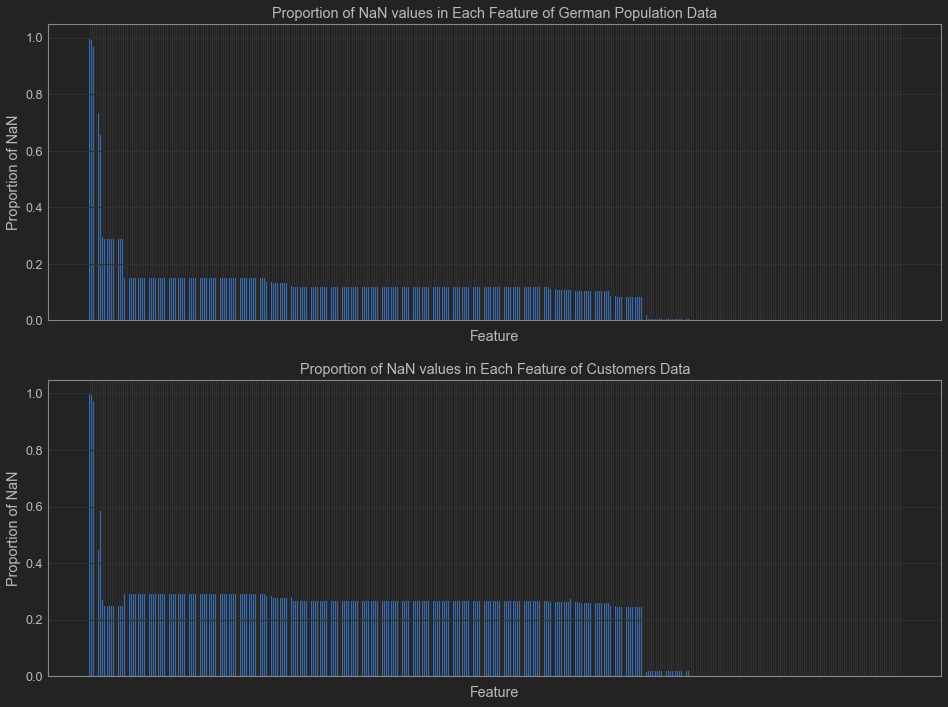

In [39]:
# Plot NaN percentages of both dataframes for comparison
plt.figure(figsize=(16, 12))
ax = plt.subplot(2,1,1)
ax.bar(azdias_nan_percent.index, azdias_nan_percent.values)
ax.set_xticklabels([])
ax.set_xlabel('Feature')
ax.set_ylabel('Proportion of NaN')
ax.set_title('Proportion of NaN values in Each Feature of German Population Data')

ax = plt.subplot(2,1,2)
ax.bar(customers_nan_percent_resort.index, customers_nan_percent_resort.values)
ax.set_xticklabels([])
ax.set_xlabel('Feature')
ax.set_ylabel('Proportion of NaN')
ax.set_title('Proportion of NaN values in Each Feature of Customers Data')

plt.show()

In the above plots, I hid the names of the features due to excessive amount, but I have matched the order of the features with both plot for easier comparison.

We can see that there are several features where almost all the entries (over 90%) are NaN. Some features also have very high amounts of NaN (over 60%), but the majority of features appear to be well-populated.

While the top features with missing values are the almost the same for both sets (particular for the ALTER_KIND columns), the main difference in the customers data is that, interestingly, there is a large amount of features where the amount of missing data appear to be larger than the population data. More specifically, certain features in azdias dataframe have NaN percentages at around 10-20%, while corresponding features in the customers dataframe have NaN percentage at around 20-30%.

I find this a little surprising as I would have expected that the customers data would have higher percentages of known information than the general population data.

In any case, columns with very high percentages of NaN data may be able to be dropped for model building as they offer very little information, to be further explored.

Upon further inspection of the documentation, it is also seen that, for a significant amount of variables, particularly categorical ones, have "uncategorised" values encoded as 0 or -1, as well as X and XX for the CAMEO columns. Perhaps it may make sense to treat such values the same as NaN. Some variables also appear to use 9 or 10 to represent unknown.

Since 

First, for easier cleaning over both dataframes, I will combine both dataframes into a single dataframe with a new identifier column, KNOWN_CUSTOMER

In [40]:
# Set general population as 0 and customers as 1
azdias_clean['KNOWN_CUSTOMER'] = False
customers_clean['KNOWN_CUSTOMER'] = True

In [41]:
# Append dataframes into single dataframe
df = customers_clean.append(azdias_clean)

And then replace all the relevant unknown markers with NaN values.

Based on reviewing the documentation, it appears that those that use category 9 as an unknown value include columns with KBA05 prefix, columns with SEMIO prefix, and RELAT_AB.

Furthermore, certain categorical columns use 0 to denote None rather than unknown, so these 0 values should be kept. These are columns with PLZ8 prefix, columns with KBA05 prefix, columns with KBA13 prefix, and ONLINE_AFFINITAET. There are also binary columns where 0 should not be removed.

The columns starting with D19 also use 10 to represent no transaction known.

In [42]:
df_clean = df.copy()

KBA05_cols = [col for col in df.columns if 'KBA05' in col]
SEMIO_cols = [col for col in df.columns if 'SEMIO' in col]
KBA13_cols = [col for col in df.columns if 'KBA13' in col]
PLZ8_cols = [col for col in df.columns if 'PLZ8' in col]
D19_cols = [col for col in df.columns if 'D19' in col]
binary_cols = list(df.columns[df.nunique() == 2])

# Replace XX in columns CAMEO_DEU_2015 and CAMEO_INTL_2015 with NaN
for col in ['CAMEO_DEU_2015', 'CAMEO_INTL_2015']:
    df_clean[col] = df_clean[col].replace('XX', np.nan)

# Replace X in column CAMEO_DEUG_2015 with NaN
df_clean['CAMEO_DEUG_2015'] = df_clean['CAMEO_DEUG_2015'].replace('X', np.nan)

# Replace all 0 and -1 in non-numerical columns with NaN, except columns that use 0 as None
# and binary columns
zero_neg_one_cols = df.columns.drop(numerical_columns).drop(
    PLZ8_cols).drop(KBA05_cols).drop(KBA13_cols, errors='ignore').drop(
    binary_cols).drop('ONLINE_AFFINITAET')

for col in zero_neg_one_cols:
    df_clean[col] = df_clean[col].replace(-1, np.nan)
    df_clean[col] = df_clean[col].replace(0, np.nan)

# Replace 9 in columns where 9 means unknown with NaN
nine_unknown_cols = []
nine_unknown_cols.extend(KBA05_cols)
nine_unknown_cols.extend(SEMIO_cols)
nine_unknown_cols.append('RELAT_AB')

for col in nine_unknown_cols:
    df_clean[col] = df_clean[col].replace(9, np.nan)

# Replace 10 in columns where 10 means unknown with NaN
for col in D19_cols:
    df_clean[col] = df_clean[col].replace(10, np.nan)

Another thing to correct is that there are some nan values recorded as the string 'nan' rather than the actual NaN marker. I will replace all such values with the string NaN.

In [43]:
(df_clean == 'nan').sum().sum()

298814

In [44]:
# Convert string 'nan' to np.nan in all columns
df_clean = df_clean.apply(lambda x: x.replace('nan', np.nan))

In [45]:
# Check there is none remaining
(df_clean == 'nan').sum().sum()

0

In [46]:
df_clean.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,KNOWN_CUSTOMER
0,9626,2.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0.0,1,4,True
1,9628,NaN,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,3,FOOD,SINGLE_BUYER,0.0,1,4,True
2,143872,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0.0,2,4,True
3,143873,1.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0.0,1,4,True
4,143874,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0.0,1,3,True


In [47]:
# Check there are no -1 values left in dataframe
(df_clean == -1).sum().sum()

0

In [48]:
# Check that no binary columns have been tampered (minimum unique values in any column should be 2)
df_clean.nunique().sort_values().head()

KNOWN_CUSTOMER      2
KONSUMZELLE         2
DSL_FLAG            2
GREEN_AVANTGARDE    2
HH_DELTA_FLAG       2
dtype: int64

Now that we have replaced unknown values with NaN, let us see how the amount of NaN values in the dataframe have been affected:

In [49]:
azdias_clean2 = df_clean[df_clean['KNOWN_CUSTOMER'] == False]
customers_clean2 = df_clean[df_clean['KNOWN_CUSTOMER'] == True]

azdias_nan_percent = azdias_clean2.isna().sum().sort_values(
    ascending=False) / azdias_clean2.shape[0]
customers_nan_percent = customers_clean2.isna().sum().sort_values(
    ascending=False) / customers_clean2.shape[0]
customers_nan_percent_resort = customers_nan_percent.reindex(
    azdias_nan_percent.index)

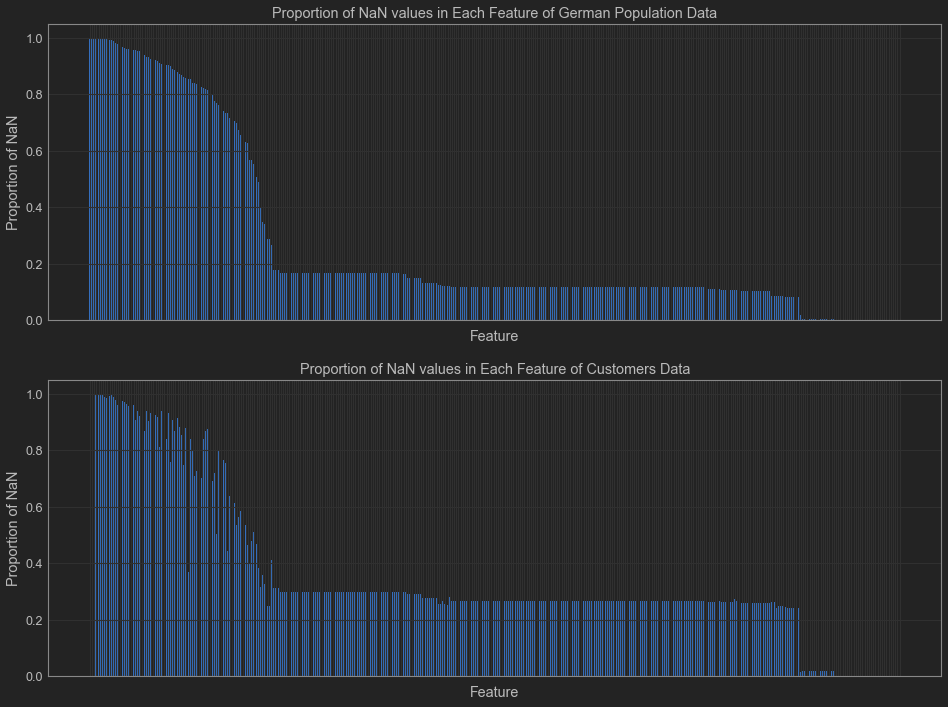

In [50]:
# Plot NaN percentages of both dataframes for comparison
plt.figure(figsize=(16, 12))
ax = plt.subplot(2, 1, 1)
ax.bar(azdias_nan_percent.index, azdias_nan_percent.values)
ax.set_xticklabels([])
ax.set_xlabel('Feature')
ax.set_ylabel('Proportion of NaN')
ax.set_title(
    'Proportion of NaN values in Each Feature of German Population Data')

ax = plt.subplot(2, 1, 2)
ax.bar(customers_nan_percent_resort.index, customers_nan_percent_resort.values)
ax.set_xticklabels([])
ax.set_xlabel('Feature')
ax.set_ylabel('Proportion of NaN')
ax.set_title('Proportion of NaN values in Each Feature of Customers Data')

plt.show()

In [54]:
azdias_nan_percent.head(20)

ONLINE_PURCHASE                1.000000
CUSTOMER_GROUP                 1.000000
PRODUCT_GROUP                  1.000000
D19_TELKO_ONLINE_QUOTE_12      0.999976
D19_VERSI_ONLINE_QUOTE_12      0.999890
D19_BANKEN_ONLINE_QUOTE_12     0.998688
ALTER_KIND4                    0.998648
TITEL_KZ                       0.997576
ANZ_TITEL                      0.996432
ALTER_KIND3                    0.993077
D19_VERSI_ONLINE_DATUM         0.991702
D19_TELKO_ONLINE_DATUM         0.990796
D19_BANKEN_LOKAL               0.981513
D19_BANKEN_OFFLINE_DATUM       0.977911
D19_VERSAND_ONLINE_QUOTE_12    0.967361
ALTER_KIND2                    0.966900
D19_VERSI_OFFLINE_DATUM        0.962962
D19_TELKO_ANZ_12               0.962713
D19_DIGIT_SERV                 0.962344
D19_BIO_OEKO                   0.958319
dtype: float64

We can see that, compared to the previous values before cleaning, there are significantly more columns that have a high percentage of NaN values. Based on visual inspection, I would say that around one-fifth of the columns have NaN values in excess of 60%.

### Fill NaN values

Next, I will fill in the NaN values in the features. For numerical features, I will fill with the mean of the column while the categorical columns will be filled with the mode.

In [49]:
# Create a new cleaning dataframe, dropping the ID and the timestamp columns
# as well as the column that is specific to the customers data
df_clean2 = df_clean.drop(columns=['LNR', 'EINGEFUEGT_AM', 'PRODUCT_GROUP', 
                                   'CUSTOMER_GROUP', 'ONLINE_PURCHASE'])

In [50]:
# Extract the categorical columns by dropping the known numerical columns
cat_columns_df = df_clean2.drop(columns=numerical_columns)

In [51]:
# Fill categorical column NaN with mode
cat_columns_df_filled = cat_columns_df.apply(lambda x: x.fillna(x.mode()[0]))

In [52]:
# Get numerical columns
num_columns_df = df_clean2[numerical_columns].copy()

In [53]:
# Fill numerical column NaN with mean
num_columns_df_filled = num_columns_df.apply(lambda x: x.fillna(x.mean()))

In [54]:
# Check how many NaN values there are left:
print(cat_columns_df_filled.isna().sum().sum())
print(num_columns_df_filled.isna().sum().sum())

0
0


### Get Dummy Variables

Next I convert the categorical columns to dummy variables:

In [56]:
# Convert catagorical columns (using columns argument to ensure int/float columns get converted)
cat_dummies = pd.get_dummies(cat_columns_df_filled,
                             columns=cat_columns_df_filled.columns, drop_first=True)

In [57]:
# Re-separate the azdias and customers dataframes
azdias_cat_dummies = cat_dummies.tail(891221)
customers_cat_dummies = cat_dummies.head(191652)
azdias_num_columns_df_filled = num_columns_df_filled.tail(891221)
customers_num_columns_df_filled = num_columns_df_filled.head(191652)

In [58]:
# Merge the converted categorical columns with numerical columns to create final data
final_azdias = pd.merge(
    azdias_cat_dummies, azdias_num_columns_df_filled, left_index=True, right_index=True)
final_customers = pd.merge(
    customers_cat_dummies, customers_num_columns_df_filled, left_index=True, right_index=True)

In [59]:
final_azdias

,AGER_TYP_2.0,AGER_TYP_3.0,AKT_DAT_KL_2.0,AKT_DAT_KL_3.0,AKT_DAT_KL_4.0,AKT_DAT_KL_5.0,AKT_DAT_KL_6.0,AKT_DAT_KL_7.0,AKT_DAT_KL_8.0,AKT_DAT_KL_9.0,...,GEBURTSJAHR,VERDICHTUNGSRAUM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_HH_TITEL,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4
0,1,0,0,0,0,0,0,0,0,0,...,0,4.656614,2003.044442,1993.243781,1.809025,0.044647,11.820413,13.442412,14.505306,15.136711
1,1,0,0,0,0,0,0,0,0,1,...,1996,0.000000,2004.000000,1992.000000,2.000000,0.000000,11.820413,13.442412,14.505306,15.136711
2,1,0,0,0,0,0,0,0,0,1,...,1979,1.000000,2000.000000,1992.000000,1.000000,0.000000,11.820413,13.442412,14.505306,15.136711
3,1,0,0,0,0,0,0,0,0,0,...,1957,0.000000,1998.000000,1997.000000,0.000000,0.000000,11.820413,13.442412,14.505306,15.136711
4,1,0,0,0,0,0,0,0,0,0,...,1963,1.000000,2004.000000,1992.000000,4.000000,0.000000,11.820413,13.442412,14.505306,15.136711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,1,0,0,0,0,1,0,0,0,0,...,1976,4.656614,2014.000000,1992.000000,1.000000,0.000000,11.820413,13.442412,14.505306,15.136711
891217,1,0,0,0,0,0,0,0,0,1,...,1970,0.000000,1999.000000,1992.000000,1.000000,0.000000,11.820413,13.442412,14.505306,15.136711
891218,1,0,0,0,0,0,0,0,0,0,...,1976,0.000000,2013.000000,1992.000000,0.000000,0.000000,11.820413,13.442412,14.505306,15.136711
891219,1,0,0,0,0,0,0,0,0,1,...,1994,1.000000,1998.000000,1992.000000,1.000000,0.000000,17.000000,13.442412,14.505306,15.136711


In [60]:
final_customers

,AGER_TYP_2.0,AGER_TYP_3.0,AKT_DAT_KL_2.0,AKT_DAT_KL_3.0,AKT_DAT_KL_4.0,AKT_DAT_KL_5.0,AKT_DAT_KL_6.0,AKT_DAT_KL_7.0,AKT_DAT_KL_8.0,AKT_DAT_KL_9.0,...,GEBURTSJAHR,VERDICHTUNGSRAUM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_HH_TITEL,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4
0,1,0,0,0,0,0,0,0,0,0,...,0,8.000000,1994.0,1992.000000,2.0,0.000000,11.820413,13.442412,14.505306,15.136711
1,1,0,0,0,0,0,0,0,0,1,...,0,4.656614,2007.0,1993.243781,3.0,0.044647,11.820413,13.442412,14.505306,15.136711
2,1,0,0,0,0,0,0,0,0,0,...,0,0.000000,1996.0,1992.000000,1.0,0.000000,11.820413,13.442412,14.505306,15.136711
3,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,1997.0,1992.000000,0.0,0.044647,11.820413,13.442412,14.505306,15.136711
4,1,0,0,0,0,0,0,0,0,0,...,1960,1.000000,1997.0,1992.000000,4.0,0.000000,11.820413,13.442412,14.505306,15.136711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191647,0,0,0,0,0,0,0,0,0,0,...,0,4.000000,1994.0,1992.000000,1.0,0.000000,11.820413,13.442412,14.505306,15.136711
191648,1,0,1,0,0,0,0,0,0,0,...,0,0.000000,2002.0,1997.000000,0.0,0.044647,11.820413,13.442412,14.505306,15.136711
191649,1,0,0,0,0,0,0,0,0,0,...,1944,24.000000,1997.0,1992.000000,3.0,0.000000,11.820413,13.442412,14.505306,15.136711
191650,0,1,0,0,0,0,0,0,0,0,...,0,7.000000,1997.0,1992.000000,4.0,0.000000,11.820413,13.442412,14.505306,15.136711


In [61]:
final_azdias.drop(columns='KNOWN_CUSTOMER_True', inplace=True)
final_customers.drop(columns='KNOWN_CUSTOMER_True', inplace=True)

In [ ]:
# Convert data to float32 to reduce size
final_azdias = final_azdias.astype(np.float32)
final_customers = final_customers.astype(np.float32)

In [62]:
# Dump data to pickle file which can be loaded for next section
pickle.dump(final_azdias, open('final_azdias.pickle', 'wb'))
pickle.dump(final_customers, open('final_customers.pickle', 'wb'))

In [65]:
%reset

# Reset variables to free up memory for next part

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

For customer segmentation, I will perform the following steps:
1. Dimension reduction using Principal Component Analysis (PCA) to find the optimal number of features to use
2. Finding the appropriate number of clusters using K-Means clustering to group population and customer data
3. Based on the appropriate number of features and clusters, find the probabilities that a sample from each cluster is likely to be a customer of the company


In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc

# magic word for producing visualizations in notebook
%matplotlib inline

# Note: Jupyter Notebook created using Monokai dark theme from JupyterThemes package
# The below will set up styles for plots for viewability on a dark background
from jupyterthemes import jtplot
jtplot.style('monokai')

from IPython.display import Audio

# Define sound to play when long computation is completed
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Load the data from previous section
final_azdias = pickle.load(open('final_azdias.pickle', 'rb'))
final_customers = pickle.load(open('final_customers.pickle', 'rb'))

In [3]:
# Convert data to float32 to reduce size
final_azdias = final_azdias.astype(np.float32)
final_customers = final_customers.astype(np.float32)

### Dimension reduction with PCA

Firstly, in order to reduce computation needed for clustering, I will reduce the number of features by using PCA. I will train the PCA using a sample of 300,000 data points from the population data:

In [4]:
# Take sample of 300,000 of the population for training PCA
final_azdias_sample = final_azdias.head(300000)

Next, before fitting the data to the PCA, we need to perform imputation and scaling of the data using SKLearn's SimpleImputer and StandardScaler:

In [5]:
%%time
imputer = SimpleImputer()
df_imp = imputer.fit_transform(final_azdias_sample)

Wall time: 12.6 s


In [6]:
%%time
scaler = StandardScaler()
df_sca = scaler.fit_transform(df_imp)

Wall time: 12.2 s


Now the imputed and scaled data are fit using PCA:

In [7]:
%%time
pca = PCA().fit(df_sca)
# Play sound when done
Audio(wave, rate=10000, autoplay=True)

Wall time: 1min 18s


For the number of principal components (PCs) to use, I will set the threshold at 80%, i.e. where the PCs can explain more than 80% of the variance in the data

In [8]:
# Get cumulative explained varience by each variable
cumul_values = np.cumsum(pca.explained_variance_ratio_)

# Get actual point where cumulative variance exceeds 80%
optimal_pct = cumul_values[cumul_values > 0.8][0]

# Number of PCs at optimal point
num_comp = np.where(cumul_values == optimal_pct)[0][0]
num_comp

798

We see that the number of PCs that cumulatively explain 80% of variance is at 798 PCs.

Next, I plot a graph in order to visualise how increasing the number of PCs increase the value of explained variance, indicating the point where explained variance exceeds 80%

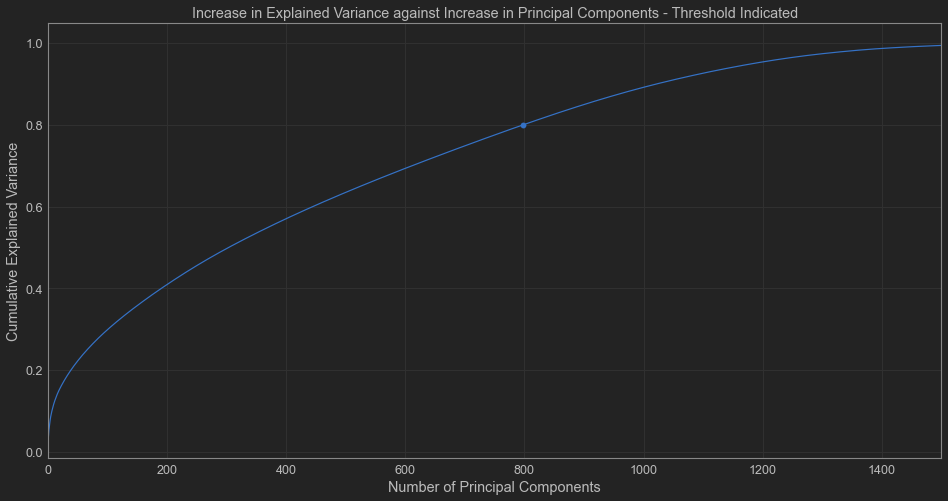

In [116]:
# Number of variables
num_variables = len(pca.explained_variance_ratio_)

# Plot cumulative explained variance as number of PCs increases, with point indicating
# where the explained variance exceeds the threshold
plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 1, 1)
ax.plot(np.arange(num_variables), cumul_values)
ax.set_xlim(0, 1500)
ax.scatter(num_comp, optimal_pct)
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title(
    'Increase in Explained Variance against Increase in Principal Components - Threshold Indicated')

plt.show()

Now that the optimal number of PCs is identified, we transform the sample data based on that PC amount:

In [117]:
%%time
# Fit PCA with optimal number of components
pca_opt = PCA(n_components=num_comp)
df_pca = pca_opt.fit_transform(df_sca)

# Play sound when done
Audio(wave, rate=10000, autoplay=True)

Wall time: 1min 53s


Let us inspect some of the top PCs identified by the PCA algorithm:

In [118]:
# Create dataframe of the PCs and the weights in relation to the original features
df_pca_weights = pd.DataFrame(pca_opt.components_.transpose(), 
                              index = final_azdias.columns, columns= np.arange(1, num_comp + 1))

In [119]:
df_pca_weights

,1,2,3,4,5,6,7,8,9,10,...,789,790,791,792,793,794,795,796,797,798
AGER_TYP_2.0,0.016843,-0.014619,0.059084,-0.009620,-0.056695,0.004616,0.038026,-0.008199,-0.012835,0.003030,...,0.004069,0.038561,-0.026588,-0.028302,0.004314,-0.004851,-0.020404,-0.039323,0.042077,0.003148
AGER_TYP_3.0,-0.006959,0.000965,-0.013307,-0.006248,0.024060,-0.011589,-0.003169,-0.007601,0.007062,-0.010642,...,0.003203,-0.008880,0.040261,0.001520,0.006051,0.037396,0.063957,0.027629,-0.052274,-0.008893
AKT_DAT_KL_2.0,-0.003772,0.003817,-0.008078,-0.001837,0.004095,-0.001227,-0.000313,0.004974,-0.003924,0.005574,...,-0.029723,0.003860,-0.044852,-0.014722,0.018969,-0.046058,0.054566,0.033291,0.058062,0.046412
AKT_DAT_KL_3.0,-0.008464,0.016001,0.037517,-0.009785,0.012348,0.002956,-0.005356,-0.001176,0.010533,-0.014924,...,-0.021584,-0.050714,-0.034853,0.102965,0.074105,-0.124517,0.017534,0.026486,0.045633,0.005861
AKT_DAT_KL_4.0,-0.007564,0.011963,0.032768,-0.009415,0.007933,0.002621,-0.001435,0.002463,0.002401,-0.013548,...,-0.042896,0.011166,0.023309,-0.029891,-0.007212,0.048002,0.011369,0.002514,-0.014849,-0.005452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANZ_HH_TITEL,-0.000933,-0.015991,-0.001946,-0.016775,0.017401,0.021565,0.015396,0.011301,0.009711,0.001612,...,0.001869,-0.012608,-0.021070,0.028597,-0.010656,0.000765,0.009546,0.053588,-0.028192,0.005963
ALTER_KIND1,-0.000923,0.000638,-0.009635,0.001116,0.007390,-0.013038,0.008666,-0.005992,0.002929,0.004829,...,0.006642,0.014428,0.009377,-0.005988,0.002657,0.005730,-0.016811,-0.019794,0.000492,-0.028027
ALTER_KIND2,-0.000500,0.000177,-0.004125,0.000649,0.004092,-0.007314,0.004821,-0.003505,0.000967,0.001080,...,0.022218,0.009490,0.007784,0.002023,-0.014852,0.015307,0.013788,-0.000074,-0.012530,0.016136
ALTER_KIND3,-0.000146,-0.000156,-0.000894,0.000297,0.002001,-0.003105,0.001700,-0.001230,0.000145,0.000658,...,0.005808,0.012673,0.000333,0.021339,-0.029838,0.046163,-0.008024,0.005978,0.006185,0.021161


In [79]:
# 1st PC sorted by weights of original features
pc_sorted = df_pca_weights.loc[:,1].sort_values(ascending = False)
pc_sorted

KOMBIALTER_9              0.099539
CAMEO_DEU_2015_6B         0.090960
FINANZTYP_4               0.080525
HH_EINKOMMEN_SCORE_2.0    0.078661
SEMIO_DOM_6               0.076101
                            ...   
KBA13_KW_120_1.0         -0.034573
PLZ8_ANTG1_1.0           -0.035107
KBA13_ANTG1_1.0          -0.035377
FINANZTYP_6              -0.035444
GEBURTSJAHR              -0.045716
Name: 1, Length: 1866, dtype: float32

The first PC is most positively correlated to KOMBIALTER_9 (not clear what this means), CAMEO_DEU_2015_6B (Petty Bourgeois type of occupation), FINANZTYP_4 ("be prepared" financial type), HH_EINKOMMEN_SCORE_2.0 (very high income), and SEMIO_DOM_6 ("very low affinity" to dominant mind? Meaning unclear).

The first PC is most negatively correlated to GEBURTSJAHR (year of birth), FINANZTYP_6 ("unremarkable" finance type), KBA13_ANTG1_1.0 and PLZ8_ANTG1_1.0 (both indicate low shares of small family houses in the area), and KBA13_KW_120_1.0 (very low share of cars with high engine power).

From this, it appears that this principal component is correlated with an younger, high-income, more financially prepared person, who lives in an area with a large amount of small houses and powerful cars.

In [80]:
# 2nd PC sorted by weights of original features
pc_sorted = df_pca_weights.loc[:,2].sort_values(ascending = False)
pc_sorted

KBA05_BAUMAX_1.0         0.075399
ANZ_PERSONEN             0.074484
ONLINE_AFFINITAET_5.0    0.070954
KBA13_ANTG1_3.0          0.070229
FINANZ_MINIMALIST_5      0.067792
                           ...   
D19_KONSUMTYP_9.0       -0.091673
PLZ8_ANTG3_3.0          -0.092898
KBA13_ANTG3_3.0         -0.093980
PLZ8_ANTG1_1.0          -0.100266
KBA13_ANTG1_1.0         -0.100744
Name: 2, Length: 1866, dtype: float32

The second PC is most positively correlated to KBA05_BAUMAX_1.0 (mainly 1-2 family homes in the microcell), ANZ_PERSONEN (number of adults in the household), ONLINE_AFFINITAET_5.0 (highest online affinity), KBA13_ANTG1_3.0 (high shares of small family houses in the area), and FINANZ_MINIMALIST_5 (very low financial interest).

The second PC is most negatively correlated to KBA13_ANTG1_1.0 and PLZ8_ANTG1_1.0 (low shares of small family houses in the area), KBA13_ANTG3_3.0 and PLZ8_ANTG3_3.0 (high shares of large family houses in the area), and D19_KONSUMTYP_9.0 (inactive consumption type).

From this, it appears that this principal component is correlated with a person living in small homes (1-2 people) but with higher number of people in such homes. The area they live in have high number of small houses, and they have high consumption but low financial interests.

In [81]:
# 3rd PC sorted by weights of original feature
pc_sorted = df_pca_weights.loc[:,3].sort_values(ascending = False)
pc_sorted

ONLINE_AFFINITAET_5.0         0.096669
CJT_TYP_1_5.0                 0.092239
CJT_TYP_2_5.0                 0.090626
PRAEGENDE_JUGENDJAHRE_14.0    0.090489
KOMBIALTER_2                  0.088158
                                ...   
CJT_TYP_3_5.0                -0.102982
CJT_TYP_5_5.0                -0.103770
ALTERSKATEGORIE_GROB_4       -0.113601
FINANZ_VORSORGER_5           -0.119586
KOMBIALTER_4                 -0.126040
Name: 3, Length: 1866, dtype: float32

The third PC is most positively correlated to ONLINE_AFFINITAET_5.0 (highest online affinity), CJT_TYP_1_5.0 and CJT_TYP_2_5.0 (variables related customer journey, but meaning is not documented), PRAEGENDE_JUGENDJAHRE_14.0 (main movement of person's youth is 90ies - digital media kids) and KOMBIALTER_2 (meaning unclear).

The third PC is most negatively correlated to KOMBIALTER_4 (meaning unclear), FINANZ_VORSORGER_5 (very low financial preparedness), ALTERSKATEGORIE_GROB_4 (age group > 60), and CJT_TYP_5_5.0 and CJT_TYP_3_5.0 (meaning unclear).

From this, it appears that this principal component is correlated with high online affinity people who was mostly influenced by the digital boom of the 90s, with medium-to-high financial preparedness.

### Determine number of clusters with K-Means clustering

Next, we determine the number of clusters to use with K-means clustering by using the elbow method. This method works by plotting the inertia scores against the number of clusters (k). The chart should show an "arm" shape, with an "elbow" turning point. For the chart below I use the KElbowVisualizer from the Yellowbrick package which also helps to identify the elbow point by finding the point of maximum curvature on the arm curve. 

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

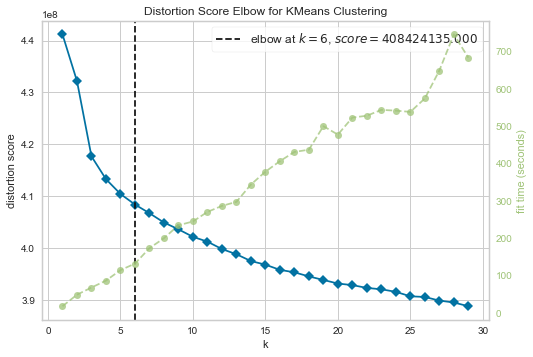

Wall time: 2h 55min 27s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
%%time
# Arm plot to determine optimum k using package from Yellowbrick package
k_means = KMeans()
visualizer = KElbowVisualizer(k_means, k=(1, 30))
visualizer.fit(df_pca)
visualizer.show()

# Play sound when done
Audio(wave, rate=10000, autoplay=True)

In [87]:
Audio(wave, rate=10000, autoplay=True)

Based on the above, we see that the optimal number of clusters is k = 6

In [9]:
# Initialise K-means with 6 clusters
k_means_optimal = KMeans(n_clusters=6, random_state=1)

In [10]:
num_comp = 798

In [122]:
pickle.dump(pca_opt, open('pca_opt.pickle', 'wb'))
pickle.dump(k_means_optimal, open('k_means_optimal.pickle', 'wb'))

### Process the full population and customers data and predict

Now that we have determined the appropriate number of PCs and clusters, we process the full population and customers data, and use the prediction model to label each data point with the appropriate cluster:

In [16]:
pca_opt = pickle.load(open('pca_opt.pickle', 'rb'))
k_means_optimal = pickle.load(open('k_means_optimal.pickle', 'rb'))

In [11]:
%%time
# Impute full azdias dataframe
final_azdias_imp = imputer.transform(final_azdias)

Wall time: 1min 23s


In [12]:
%%time
# Scale full azdias dataframe
final_azdias_sca = scaler.transform(final_azdias_imp)

Wall time: 14 s


In [17]:
%%time
# Use PCA model to transform azdias data
final_azdias_pca = pca_opt.transform(final_azdias_sca)

Wall time: 40.4 s


In [18]:
%%time
# Fit the K-means model to azdias data and predict the clusters
final_azdias_labels = k_means_optimal.fit_predict(final_azdias_pca)
Audio(wave, rate=10000, autoplay=True)

Wall time: 7min


In [19]:
# Check size of output
final_azdias_labels.shape

(891221,)

In [20]:
%%time
# Impute full customers dataframe
final_customers_imp = imputer.transform(final_customers)

Wall time: 4.86 s


In [21]:
%%time
# Scale full customers dataframe
final_customers_sca = scaler.transform(final_customers_imp)

Wall time: 1.6 s


In [22]:
%%time
# Use PCA model on customers data
final_customers_pca = pca_opt.transform(final_customers_sca)

Wall time: 5.69 s


In [23]:
%%time
# Use the K-means model to predict the clusters for customers data
final_customers_labels = k_means_optimal.predict(final_customers_pca)

Wall time: 431 ms


In [24]:
# Check size of output
final_customers_labels.shape

(191652,)

In [101]:
# Record the clusters to each dataframe
final_azdias['cluster'] = final_azdias_labels
final_customers['cluster'] = final_customers_labels

In [102]:
pickle.dump(final_azdias, open('final_azdias_labeled.pickle', 'wb'))
pickle.dump(final_customers, open('final_customers_labeled.pickle', 'wb'))

### Compare how likely each cluster will be the company's customer

Now that we have clustered both the general and customer data points, we can analyse which clusters are more likely to be customers of the company. To do this, we get the proportion of each cluster compared to the total amount of data points for the general population and the customer group respectively:

In [125]:
# Get the proportion of data for each cluster in azdias
azdias_cluster_proportions = pd.DataFrame(final_azdias.groupby('cluster')['AGER_TYP_2.0'].count() /
                                          final_azdias.shape[0])
azdias_cluster_proportions = azdias_cluster_proportions.rename(
    columns={'AGER_TYP_2.0': 'proportion'})

In [129]:
# Get the proportion of data for each cluster in customers
customers_cluster_proportions = pd.DataFrame(final_customers.groupby('cluster')['AGER_TYP_2.0'].count() /
                                             final_customers.shape[0])
customers_cluster_proportions = customers_cluster_proportions.rename(
    columns={'AGER_TYP_2.0': 'proportion'})

In [168]:
# Put the proportions in 1 dataframe for plotting next chart
cluster_proportions = pd.merge(azdias_cluster_proportions, customers_cluster_proportions,
                               left_on='cluster', right_on='cluster').reset_index()
cluster_proportions.rename(columns={'proportion_x': 'General Population',
                                    'proportion_y': 'Customers'}, inplace=True)
# Get proportion of customer over proportion in general population
cluster_proportions['compare'] = (cluster_proportions['Customers'] /
                                  cluster_proportions['General Population'])

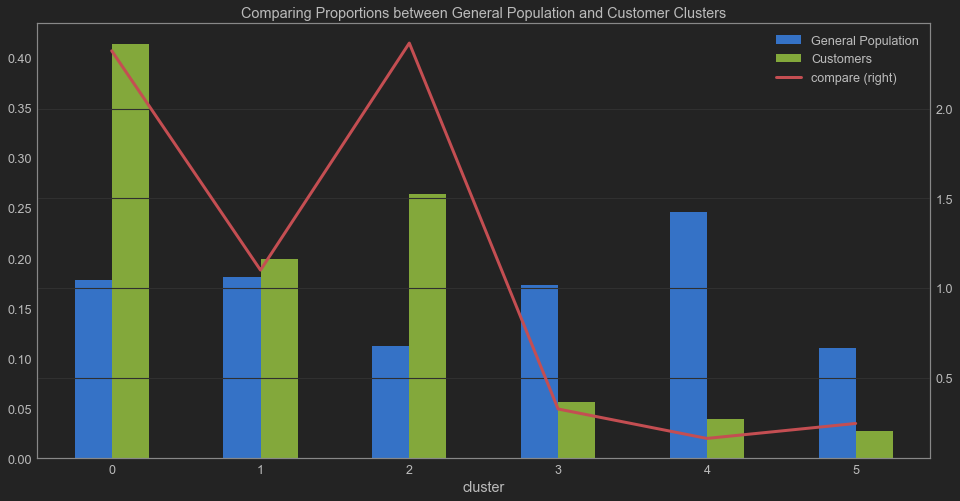

In [173]:
ax = cluster_proportions.plot(x='cluster', y=['General Population', 'Customers'], kind='bar',
                              figsize=(16, 8),
                              title='Comparing Proportions between General Population and Customer Clusters')
cluster_proportions.plot(x='cluster', y='compare', ax=ax,
                         secondary_y=True, style='r-', lw=3)
plt.show()

As seen above, Clusters 0 and 2 are significantly more likely (over 2x more likely) to be the company's customers than the other clusters. Cluster 1 is similar for both sets, while Clusters 3, 4 and 5 are significantly less likely to be represented in the customers database (less than 0.5x).

Let us inspect the centres of the top principal components in relation to each cluster to see if there are any potential insights:

In [182]:
# Create dataframe with clusters on row and the cluster centres in relation to the PCs on columns
cluster_centers = pd.DataFrame(k_means_optimal.cluster_centers_, columns=np.arange(1, num_comp + 1))
cluster_centers

,1,2,3,4,5,6,7,8,9,10,...,789,790,791,792,793,794,795,796,797,798
0,-1.484241,1.356004,-6.546427,-0.387957,1.587276,0.704375,-2.235043,0.589152,-0.525486,0.221720,...,-0.002691,0.004986,0.001095,0.004070,-0.007021,-0.003178,0.012606,-0.000428,0.001889,-0.006783
1,-3.375429,8.226965,3.682298,-0.448893,1.288491,-0.274765,0.128735,-0.103220,0.331253,0.467582,...,0.001407,0.004123,0.002072,-0.016708,-0.002392,0.015823,-0.014968,0.003400,-0.006306,0.002868
2,20.155941,0.081272,1.401703,0.368817,1.518502,0.425425,0.548699,-0.220139,-0.117645,0.309549,...,0.011532,-0.005132,0.000505,-0.001540,-0.006886,0.001064,-0.001600,0.008654,-0.011822,0.003647
3,-4.018290,-7.864355,2.763699,-0.946174,1.742027,0.226578,1.053241,1.847653,0.936114,1.677999,...,-0.001170,0.018378,-0.002344,0.005092,0.002797,-0.001201,-0.001987,-0.002168,0.005338,-0.006221
4,-1.014120,-0.614661,-0.473880,-1.638812,-4.320482,-1.238545,0.307747,-1.085839,-0.348303,-0.421092,...,0.001731,-0.006137,-0.014935,0.009952,0.001528,-0.010014,0.004067,-0.011455,0.004995,-0.000928
5,-4.268974,-2.586692,0.153559,7.397202,1.085756,1.883362,0.781535,-0.850163,-0.281944,-3.925477,...,-0.018348,-0.025914,-0.026949,-0.005818,0.008477,0.001350,-0.018663,-0.002796,0.014987,0.021038


Based on the above, we see that Cluster 2, which has the highest probability of customers compared to the general population, has a very high positive centre value with the first PC, while all other clusters have negative centre values with this PC. As previously seen, the first principal component is correlated with an younger, high-income, more financially prepared person, who lives in an area with a large amount of small houses and powerful cars. Based on this, we could argue that this demographic is a very strong target for the company.

We also see that the second PC is has positive centre values in relation to to Clusters 0, 1 and 2, which have higher probabilities of customers than general population, while having negative centre values in relation to to Clusters 3, 4 and 5, which have lower probabilities of customers than general population. The second PC appear to indicate people living in small homes (1-2 people) but with higher number of people in such homes. The area they live in have high number of small houses, and they have high consumption but low financial interests. This seems like a very useful characteristic as it covers all the 3 clusters which have higher potential to become customers.

The third PC, which correlates with high online affinity people who was mostly influenced by the digital boom of the 90s, with medium-to-high financial preparedness, shows a more mixed bag of results, as it strongly correlates negatively to Cluster 0, but show positive significant correlations to Clusters 1, 2 and 3.

In conclusion, while this shows that while it may be complicated to group potential customers by individual observed features or principal components, using clustering methods such as k-means can help us to group people into distinct clusters which can help the company to make informed and effective marketing decisions.

In [233]:
%reset

# Reset variables to free up memory for next part

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc

# magic word for producing visualizations in notebook
%matplotlib inline

# Note: Jupyter Notebook created using Monokai dark theme from JupyterThemes package
# The below will set up styles for plots for viewability on a dark background
from jupyterthemes import jtplot
jtplot.style('monokai')

from IPython.display import Audio

# Define sound to play when long computation is completed
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
#from sklearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

In [2]:
#mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
mailout_train = pd.read_csv('mailout_train.csv')

C:\Users\chron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Inspection and cleaning

First, I inspect the mailout_train data:

In [3]:
# Inspect mailout_trail
mailout_train

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42957,42957,66338,2,1.0,0.0,NaN,NaN,NaN,NaN,10.0,...,1.0,1.0,1.0,4.0,8.0,7.0,1,0,1,4
42958,42958,67629,-1,1.0,0.0,NaN,NaN,NaN,NaN,14.0,...,1.0,1.0,1.0,5.0,9.0,7.0,1,0,1,3
42959,42959,68273,1,1.0,16.0,NaN,NaN,NaN,NaN,10.0,...,1.0,2.0,1.0,2.0,9.0,7.0,1,0,1,4
42960,42960,68581,2,1.0,18.0,NaN,NaN,NaN,NaN,13.0,...,2.0,3.0,4.0,2.0,9.0,2.0,3,0,2,4


Based on the above, we see that the mailout_trail has similar structure and thus issues to the azdias dataset, with the addition of the RESPONSE column, so I will define a function to clean the data based on the steps used in Part 0:

In [38]:
def clean_data(df, include_y=True):
    '''
    Take dataframe read from csv file and output in format ready for machine learning

    Parameter:
        df (pandas dataframe): DataFrame read from CSV provided by Arvato

    Output:
        y (pandas dataframe): The explained variable i.e. the RESPONSE column
        X (pandas dataframe): The explanatory variables
    '''
    # Drop the old index column
    df = df.drop(columns='Unnamed: 0')

    # Get the response column, which is the explained variable, and store separately
    if include_y == True:
        y = df['RESPONSE'].copy()
        df_clean = df.drop(columns='RESPONSE').copy()
    else:
        y = None
        df_clean = df.copy()

    # Convert CAMEO_DEUG_2015 and CAMEO_INTL_2015 to string
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype(str)
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].astype(str)

    # Remove .0 from each entry where applicable
    df_clean['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].apply(
        lambda x: x.replace('.0', ''))
    df_clean['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].apply(
        lambda x: x.replace('.0', ''))

    # Convert EINGEFUEGT_AM to datetime
    df_clean['EINGEFUEGT_AM'] = pd.to_datetime(df_clean['EINGEFUEGT_AM'])

    numerical_columns = ['KBA13_ANZAHL_PKW', 'ANZ_HAUSHALTE_AKTIV',
                         'ANZ_STATISTISCHE_HAUSHALTE', 'GEBURTSJAHR', 'VERDICHTUNGSRAUM',
                         'EINGEZOGENAM_HH_JAHR', 'MIN_GEBAEUDEJAHR', 'ANZ_PERSONEN',
                         'ANZ_HH_TITEL', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3',
                         'ALTER_KIND4']

    KBA05_cols = [col for col in df_clean.columns if 'KBA05' in col]
    SEMIO_cols = [col for col in df_clean.columns if 'SEMIO' in col]
    KBA13_cols = [col for col in df_clean.columns if 'KBA13' in col]
    PLZ8_cols = [col for col in df_clean.columns if 'PLZ8' in col]
    D19_cols = [col for col in df_clean.columns if 'D19' in col]
    binary_cols = list(df_clean.columns[df_clean.nunique() == 2])

    # Replace XX in columns CAMEO_DEU_2015 and CAMEO_INTL_2015 with NaN
    for col in ['CAMEO_DEU_2015', 'CAMEO_INTL_2015']:
        df_clean[col] = df_clean[col].replace('XX', np.nan)

    # Replace X in column CAMEO_DEUG_2015 with NaN
    df_clean['CAMEO_DEUG_2015'] = df_clean['CAMEO_DEUG_2015'].replace(
        'X', np.nan)

    # Replace all 0 and -1 in non-numerical columns with NaN, except columns that use 0 as None
    # and binary columns
    zero_neg_one_cols = df_clean.columns.drop(numerical_columns).drop(
        PLZ8_cols).drop(KBA05_cols).drop(KBA13_cols, errors='ignore').drop(
        binary_cols).drop('ONLINE_AFFINITAET')

    for col in zero_neg_one_cols:
        df_clean[col] = df_clean[col].replace(-1, np.nan)
        df_clean[col] = df_clean[col].replace(0, np.nan)

    # Replace 9 in columns where 9 means unknown with NaN
    nine_unknown_cols = []
    nine_unknown_cols.extend(KBA05_cols)
    nine_unknown_cols.extend(SEMIO_cols)
    nine_unknown_cols.append('RELAT_AB')

    for col in nine_unknown_cols:
        df_clean[col] = df_clean[col].replace(9, np.nan)

    # Replace 10 in columns where 10 means unknown with NaN
    for col in D19_cols:
        df_clean[col] = df_clean[col].replace(10, np.nan)

    # Convert string 'nan' to np.nan in all columns
    df_clean = df_clean.apply(lambda x: x.replace('nan', np.nan))

    # Create a new cleaning dataframe, dropping the ID and the timestamp columns
    df_clean2 = df_clean.drop(columns=['LNR', 'EINGEFUEGT_AM'])

    # Extract the categorical columns by dropping the known numerical columns
    cat_columns_df = df_clean2.drop(columns=numerical_columns)

    # Fill categorical column NaN with mode
    cat_columns_df_filled = cat_columns_df.apply(
        lambda x: x.fillna(x.mode()[0]))

    # Get numerical columns
    num_columns_df = df_clean2[numerical_columns].copy()

    # Fill numerical column NaN with mean
    num_columns_df_filled = num_columns_df.apply(lambda x: x.fillna(x.mean()))

    # Convert catagorical columns (using columns argument to ensure int/float columns get converted)
    cat_dummies = pd.get_dummies(cat_columns_df_filled,
                                 columns=cat_columns_df_filled.columns, drop_first=True)

    final_df = pd.merge(
        cat_dummies, num_columns_df_filled, left_index=True, right_index=True)

    final_df = final_df.astype(np.float32)

    return y, final_df

In [5]:
# Apply function to generate y and X
y, X = clean_data(mailout_train)

In [58]:
pickle.dump(y, open('part-2-y.pickle', 'wb'))
pickle.dump(X, open('part-2-X.pickle', 'wb'))

In [7]:
X.shape

(42962, 1840)

In [8]:
y.sum()

532

Now we have the X (explanatory variable) dataframe with 42,926 entries and the sum of the explained  variable (RESPONSE) is 532 indicating 532 responses to the 42,926 mails sent out.

### Issue with low positive results

To have an initial look on how the prediction engine would perform using a "normal" method, I will, impute, scale, and transform the X variables into principal components, then use a basic logistic regression model to see how well it identifies the people who responded to the mail out:

In [60]:
%%time
# Impute, scale and apply PCA transformation
imputer = SimpleImputer()
X_imp = imputer.fit_transform(X)
scaler = StandardScaler()
X_sca = scaler.fit_transform(X_imp)

Wall time: 2.63 s


For the PCA, since this training data set is smaller than the previous section and thus it would be more computationally feasible to use more PCs, I increase the PCA threshold to 90% in order to aim to yield better results.

In [61]:
%%time
pca = PCA().fit(X_sca)
# Play sound when done
Audio(wave, rate=10000, autoplay=True)

Wall time: 8.69 s


In [62]:
# Get cumulative explained varience by each variable
cumul_values = np.cumsum(pca.explained_variance_ratio_)

# Get actual point where cumulative variance exceeds 90%
optimal_pct = cumul_values[cumul_values > 0.9][0]

# Number of PCs at optimal point
num_comp = np.where(cumul_values == optimal_pct)[0][0]
num_comp

991

In [63]:
pca_opt = PCA(n_components=num_comp, random_state=1)
X_pca = pca_opt.fit_transform(X_sca)
Audio(wave, rate=10000, autoplay=True)

In [64]:
# Define logistic regression model and fit with y and X
log_regress_mod = LogisticRegression(max_iter=5000)
log_regress_mod.fit(X_pca, y)

LogisticRegression(max_iter=5000)

Let us see how well the model performs when applied back to the training data:

In [65]:
y_pred = log_regress_mod.predict(X_pca)

In [66]:
# Number of responders predicted by the model
y_pred.sum()

17

In [67]:
# Actual number of responders
y.sum()

532

In [68]:
# Accuracy, precision, recall and F1 scores
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     42430
           1       0.76      0.02      0.05       532

    accuracy                           0.99     42962
   macro avg       0.88      0.51      0.52     42962
weighted avg       0.99      0.99      0.98     42962



In [69]:
# The number of people the model correctly identified as responders
(y & y_pred).sum()

13

While the values above "look" good when assessing from the accuracy, precision, recall and F1 scores, the model actually has only predicted 17 people as responders (13 of which it identified correctly, or positive precision of 76%), compared to the actual number of 532. This means that its prediction power may be quite precise to identify people with strong tendencies to respond, but misses the majority of potential responders.

As such, this model would not be useful for the business use of the company. Ideally, the model should identify significantly more potential responders than the actual number of responders, so that the marketing team can reach as many potential responders as possible. It makes more sense to over-identify and send mail outs to some people who may not end up responding, rather than miss potential responders completely.

One of the key issues seems to be that the number of responders is very small (532) compared to the total amount of training sample of 42,962, or only 1.2% of the dataset. This means the model learns very little about the potential responders during training.

In [22]:
# Calulate ROC AUC score
roc_auc_score(y, y_pred)

0.5121709086527301

Additionally, a better method to evaluate the performance of the model may be the Area Under the Receiver Operating Characteristic Curve (ROC AUC) score. This method is generally a better measure than the usual accuracy/precision/recall scores for classification problems. 

### Increase positive prediction with oversampling

One strategy that could be used to address the small amount of positive values in y is using oversampling in order to allow the model to train itself to recognise positive results better. This is done by randomly selecting the minority class (the positive response results) and adding them to the training dataset with replacement.

However, oversampling the minority class could result in overfitting of the model and result in increase in generalisation error.

Another similar method to deal with this problem would be undersampling the majority class, but since the number of minority class is so small I do not think this is a good strategy in this case.

For oversampling, I use the imblearn package and refers to the below article on its usage:

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
# Initialise oversampler with "0.5" strategy, i.e. the minority class is oversampled
# until its size is 0.5x of the majority class
oversample = RandomOverSampler(sampling_strategy=0.5)

In [25]:
# Fit the oversampler
X_over, y_over = oversample.fit_resample(X, y)

In [26]:
# Check the shape of X_over
X_over.shape

(63645, 1840)

In [27]:
# Number of (oversampled) positive response.
y_over.sum()

21215

In [28]:
%%time
# Impute, scale and apply PCA transformation
imputer = SimpleImputer()
X_imp_over = imputer.fit_transform(X_over)
scaler = StandardScaler()
X_sca_over = scaler.fit_transform(X_imp_over)
pca_opt = PCA(n_components=num_comp, random_state=1)
X_pca_over = pca_opt.fit_transform(X_sca_over)
Audio(wave, rate=10000, autoplay=True)

Wall time: 51 s


In [29]:
# Fit the model using the oversampled training set
log_regress_mod.fit(X_pca_over, y_over)
Audio(wave, rate=10000, autoplay=True)

In [30]:
# Try to predict on the original training set
y_pred = log_regress_mod.predict(X_pca)

In [31]:
# Predicted positive responses
y_pred.sum()

11736

In [32]:
# Number of positive responders correctly identified
(y & y_pred).sum()

173

In [33]:
# Accuracy, precision, recall and F1 scores
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     42430
           1       0.01      0.33      0.03       532

    accuracy                           0.72     42962
   macro avg       0.50      0.53      0.43     42962
weighted avg       0.98      0.72      0.83     42962



In [34]:
# ROC AUC score
roc_auc_score(y, y_pred)

0.5263342630675204

As seen above, this at least meets the goal of the model identifying more people who are likely to have positive response to the mail out list, with 2,979 predicted compared to the actual value of around 532. 

Using the oversampling strategy of 10%, the ROC AUC score improved slightly from 0.51 to almost 0.54, so this parameter may be tuned further for better performance.

While positive precision decreases significantly as expected, as a lot of false positives have been added, I believe that the most important value is the positive recall (true positives divided by sum of true positives and false negative), which improved significantly from 2% in the previous run to 33%. 

As discussed earlier, I believe that in the real-world business sense, a useful model should minimize false negatives (people who would respond to the mail-out but not identified), while maximising true positives (people who would respond to the mail-out and identified). The amount of false positives should not be as large of a concern, as the cost per person of sending mail-outs to people who do not respond, I believe, is much less than the opportunity cost per person of not sending mail-outs to people who would have responded. 

### Search for most effective model

Next, I will try some potential supervised learning models, along with running grid search for the best parameters to use on the model. I will try these 4 models and see which one perform the best according the the ROC AUC score using its best parameters:

- Logistic regression
- Adaboost classifier
- Naive Bayes (Gaussian)
- Support vector classifier (SVC)

In [31]:
def build_model(classifier_type='logistic', optimal_parameters=None):
    '''
    Builds a model pipeline which includes imputer, scaler, PCA, oversampler and classifier.

    Parameters:
        classifier_type (str): Type of classifier to use. 'logistic', 'ada', 'naivebayes', or 'svc'
        optimal_parameters (dict): If None, a set of default parameters is used.
            Otherwise, use dictionary of optimal parameters gained from grid search model

    Output:
        pipeline (imblearn Pipeline): Model pipeline for classification
    '''
    # Select model and parameters
    if classifier_type == 'logistic':
        # Use default parameters if optimal not specified
        if optimal_parameters == None:
            max_iter = 5000
            penalty = 'l2'
            solver = 'lbfgs'
            C = 1.0
            sampling_strategy = 0.5
        else:
            max_iter = 5000
            penalty = optimal_parameters['clr__penalty']
            solver = optimal_parameters['clr__solver']
            C = optimal_parameters['clr__C']
            sampling_strategy = optimal_parameters['ovr__sampling_strategy']

        classifier = LogisticRegression(max_iter=max_iter, penalty=penalty,
                                        C=C, solver=solver)

    elif classifier_type == 'ada':
        # Use default parameters if optimal not specified
        if optimal_parameters == None:
            n_estimators = 50
            learning_rate = 1.0
            sampling_strategy = 0.5
        else:
            n_estimators = optimal_parameters['clr__n_estimators']
            learning_rate = optimal_parameters['clr__learning_rate']
            sampling_strategy = optimal_parameters['ovr__sampling_strategy']

        classifier = AdaBoostClassifier(n_estimators=n_estimators,
                                        learning_rate=learning_rate)

    elif classifier_type == 'naivebayes':
        # Use default parameters if optimal not specified
        if optimal_parameters == None:
            var_smoothing = 1e-09
            sampling_strategy = 0.5
        else:
            var_smoothing = optimal_parameters['clr__var_smoothing']
            sampling_strategy = optimal_parameters['ovr__sampling_strategy']

        classifier = GaussianNB(var_smoothing=var_smoothing)

    elif classifier_type == 'svc':
        # Use default parameters if optimal not specified
        if optimal_parameters == None:
            C = 1.0
            gamma = 'scale'
            kernel = 'rbf'
            sampling_strategy = 0.5
        else:
            C = optimal_parameters['clr__C']
            gamma = optimal_parameters['clr__gamma']
            kernel = optimal_parameters['clr__kernel']
            sampling_strategy = optimal_parameters['ovr__sampling_strategy']

        classifier = SVC(C=C, gamma=gamma, kernel=kernel)

    else:
        print('Model type not recognised')

    pipeline = Pipeline([
        ('imp', SimpleImputer()),
        ('sca', StandardScaler()),
        ('pca', PCA(n_components=991)),
        ('ovr', RandomOverSampler(sampling_strategy=sampling_strategy)),
        ('clr', classifier)
    ])

    return pipeline

In [9]:
def build_gridsearch_model(pipeline, classifier_type='logistic'):
    '''
    Take classifier pipeline and build grid search model

    Parameters: 
        pipeline (imblearn Pipeline): Model pipeline for classification
        classifier_type (str): Type of classifier to use. 'logistic', 'ada', 'naivebayes', or 'svc'

    Output:
        cv (imblearn Pipeline): Pipeline with grid search
    '''
    # Parameters for gridsearch
    if classifier_type == 'logistic':
        # Different penalty types are only supported by certain solvers so
        # need to have different sets of parameters
        parameters = [
            {'clr__penalty': ['l1'],
             'clr__solver': ['saga'],
             'clr__C': np.logspace(-2, 2, 3),
             'ovr__sampling_strategy': [0.1, 0.3, 0.5]
             },
            {'clr__penalty': ['l2'],
             'clr__solver': ['newton-cg', 'lbfgs', 'sag'],
             'clr__C': np.logspace(-2, 2, 3),
             'ovr__sampling_strategy': [0.1, 0.3, 0.5]
             },
        ]
    elif classifier_type == 'ada':
        parameters = {
            'clr__n_estimators': [10, 50, 200],
            'clr__learning_rate': [0.01, 0.1, 1],
            'ovr__sampling_strategy': [0.1, 0.3, 0.5]
        }
    elif classifier_type == 'naivebayes':
        parameters = {
            'clr__var_smoothing': [1e-08, 1e-09, 1e-10],
            'ovr__sampling_strategy': [0.1, 0.3, 0.5]
        }
    elif classifier_type == 'svc':
        parameters = {
            'clr__C': [0.1, 1, 10],
            'clr__gamma': ['scale', 'auto'],
            'clr__kernel': ['rbf', 'poly', 'sigmoid'],
            'ovr__sampling_strategy': [0.1, 0.3, 0.5]
        }
    else:
        print('Model type not recognised')

    cv = GridSearchCV(pipeline, param_grid=parameters,
                      scoring='roc_auc', n_jobs=10, verbose=10)

    return cv

For grid search, I will use a smaller sample of X and y for computation purpose

In [10]:
# Take 5,000 corresponding samples from X and y
X_gridsearch = X.sample(n=5000, random_state=1)
y_gridsearch = y.sample(n=5000, random_state=1)

In [11]:
# Check how many positive responses there are in the sample 
y_gridsearch.sum()

58

Now I will go through each of the model to see which one performs the best:

#### Logistic regression

In [12]:
# Get pipeline
pipeline = build_model(classifier_type='logistic')

In [13]:
# Build grid search model
model = build_gridsearch_model(pipeline, classifier_type='logistic')

In [14]:
%%time
model.fit(X_gridsearch, y_gridsearch)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 25min 47s


GridSearchCV(estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('sca', StandardScaler()),
                                       ('pca', PCA(n_components=991)),
                                       ('ovr',
                                        RandomOverSampler(sampling_strategy=0.5)),
                                       ('clr',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=10,
             param_grid=[{'clr__C': array([1.e-02, 1.e+00, 1.e+02]),
                          'clr__penalty': ['l1'], 'clr__solver': ['saga'],
                          'ovr__sampling_strategy': [0.1, 0.3, 0.5]},
                         {'clr__C': array([1.e-02, 1.e+00, 1.e+02]),
                          'clr__penalty': ['l2'],
                          'clr__solver': ['newton-cg', 'lbfgs', 'sag'],
                          'ovr__sampling_strategy': [0.1, 0.3, 0.5]}],
             scoring='roc_auc', verbose=10)

In [15]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [16]:
print("\nBest Parameters:", model.best_params_)
best_parameters = model.best_params_


Best Parameters: {'clr__C': 100.0, 'clr__penalty': 'l2', 'clr__solver': 'sag', 'ovr__sampling_strategy': 0.3}


In [17]:
# Build the model from best parameters 
best_model_log = build_model(classifier_type='logistic', optimal_parameters=best_parameters)

In [18]:
%%time
best_model_log.fit(X, y)

Wall time: 1min 49s


Pipeline(steps=[('imp', SimpleImputer()), ('sca', StandardScaler()),
                ('pca', PCA(n_components=991)),
                ('ovr', RandomOverSampler(sampling_strategy=0.3)),
                ('clr',
                 LogisticRegression(C=100.0, max_iter=5000, solver='sag'))])

In [19]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [20]:
%%time
y_pred = best_model_log.predict(X)

Wall time: 2.21 s


In [21]:
print(classification_report(y, y_pred))
print(roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     42430
           1       0.10      0.60      0.18       532

    accuracy                           0.93     42962
   macro avg       0.55      0.77      0.57     42962
weighted avg       0.98      0.93      0.95     42962

0.7673821455595151


In [22]:
# Dump model to pickle file
pickle.dump(best_model_log, open('best_model_log.pickle', 'wb'))

#### Adaboost classifier

In [78]:
%%time
pipeline = build_model(classifier_type='ada')
model = build_gridsearch_model(pipeline, classifier_type='ada')
model.fit(X_gridsearch, y_gridsearch)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Wall time: 17min 14s


GridSearchCV(estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('sca', StandardScaler()),
                                       ('pca', PCA(n_components=991)),
                                       ('ovr',
                                        RandomOverSampler(sampling_strategy=0.5)),
                                       ('clr', AdaBoostClassifier())]),
             n_jobs=10,
             param_grid={'clr__learning_rate': [0.01, 0.1, 1],
                         'clr__n_estimators': [10, 50, 200],
                         'ovr__sampling_strategy': [0.1, 0.3, 0.5]},
             scoring='roc_auc', verbose=10)

In [79]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [80]:
print("\nBest Parameters:", model.best_params_)
best_parameters = model.best_params_


Best Parameters: {'clr__learning_rate': 1, 'clr__n_estimators': 200, 'ovr__sampling_strategy': 0.3}


In [71]:
%%time
best_model_ada = build_model(classifier_type='ada', optimal_parameters=best_parameters)
best_model_ada.fit(X, y)

Wall time: 19min 25s


Pipeline(steps=[('imp', SimpleImputer()), ('sca', StandardScaler()),
                ('pca', PCA(n_components=991)),
                ('ovr', RandomOverSampler(sampling_strategy=0.3)),
                ('clr', AdaBoostClassifier(learning_rate=1, n_estimators=200))])

In [72]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [73]:
%%time
y_pred = best_model_ada.predict(X)

Wall time: 8.35 s


In [74]:
print(classification_report(y, y_pred))
print(roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     42430
           1       0.16      0.51      0.24       532

    accuracy                           0.96     42962
   macro avg       0.58      0.74      0.61     42962
weighted avg       0.98      0.96      0.97     42962

0.7357443662183978


In [75]:
# Dump model to pickle file
pickle.dump(best_model_ada, open('best_model_ada.pickle', 'wb'))

#### Naive Bayes

In [11]:
%%time
pipeline = build_model(classifier_type='naivebayes')
model = build_gridsearch_model(pipeline, classifier_type='naivebayes')
model.fit(X_gridsearch, y_gridsearch)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Wall time: 1min 44s


GridSearchCV(estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('sca', StandardScaler()),
                                       ('pca', PCA(n_components=991)),
                                       ('ovr',
                                        RandomOverSampler(sampling_strategy=0.5)),
                                       ('clr', GaussianNB())]),
             n_jobs=10,
             param_grid={'clr__var_smoothing': [1e-08, 1e-09, 1e-10],
                         'ovr__sampling_strategy': [0.1, 0.3, 0.5]},
             scoring='roc_auc', verbose=10)

In [12]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [13]:
print("\nBest Parameters:", model.best_params_)
best_parameters = model.best_params_


Best Parameters: {'clr__var_smoothing': 1e-08, 'ovr__sampling_strategy': 0.5}


In [77]:
%%time
best_model_bayes = build_model(classifier_type='naivebayes', optimal_parameters=best_parameters)
best_model_bayes.fit(X, y)

Wall time: 22.6 s


Pipeline(steps=[('imp', SimpleImputer()), ('sca', StandardScaler()),
                ('pca', PCA(n_components=991)),
                ('ovr', RandomOverSampler(sampling_strategy=0.5)),
                ('clr', GaussianNB(var_smoothing=1e-08))])

In [78]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [79]:
%%time
y_pred = best_model_bayes.predict(X)

Wall time: 3.31 s


In [80]:
print(classification_report(y, y_pred))
print(roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     42430
           1       0.03      0.63      0.06       532

    accuracy                           0.76     42962
   macro avg       0.51      0.70      0.46     42962
weighted avg       0.98      0.76      0.86     42962

0.6986907228004019


In [81]:
# Dump model to pickle file
pickle.dump(best_model_bayes, open('best_model_bayes.pickle', 'wb'))

#### SVC

In [23]:
%%time
pipeline = build_model(classifier_type='svc')
model = build_gridsearch_model(pipeline, classifier_type='svc')
model.fit(X_gridsearch, y_gridsearch)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Wall time: 46min 19s


GridSearchCV(estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('sca', StandardScaler()),
                                       ('pca', PCA(n_components=991)),
                                       ('ovr',
                                        RandomOverSampler(sampling_strategy=0.5)),
                                       ('clr', SVC())]),
             n_jobs=10,
             param_grid={'clr__C': [0.1, 1, 10],
                         'clr__gamma': ['scale', 'auto'],
                         'clr__kernel': ['rbf', 'poly', 'sigmoid'],
                         'ovr__sampling_strategy': [0.1, 0.3, 0.5]},
             scoring='roc_auc', verbose=10)

In [24]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [25]:
print("\nBest Parameters:", model.best_params_)
best_parameters = model.best_params_


Best Parameters: {'clr__C': 10, 'clr__gamma': 'auto', 'clr__kernel': 'sigmoid', 'ovr__sampling_strategy': 0.5}


In [32]:
%%time
best_model_svc = build_model(classifier_type='svc', optimal_parameters=best_parameters)
best_model_svc.fit(X, y)

Wall time: 51min 12s


Pipeline(steps=[('imp', SimpleImputer()), ('sca', StandardScaler()),
                ('pca', PCA(n_components=991)),
                ('ovr', RandomOverSampler(sampling_strategy=0.5)),
                ('clr', SVC(C=10, gamma='auto', kernel='sigmoid'))])

In [33]:
# Play sound when completed
Audio(wave, rate=10000, autoplay=True)

In [34]:
%%time
y_pred = best_model_svc.predict(X)

Wall time: 16min 51s


In [35]:
print(classification_report(y, y_pred))
print(roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     42430
           1       0.01      0.31      0.03       532

    accuracy                           0.71     42962
   macro avg       0.50      0.51      0.43     42962
weighted avg       0.98      0.71      0.82     42962

0.5128173515334412


In [36]:
# Dump model to pickle file
pickle.dump(best_model_svc, open('best_model_svc.pickle', 'wb'))

#### Best model conclusion

Based on the ROC AUC score, the logistic regression model appears to perform the best. While Naive Bayes has a lower ROC AUC score, it has a better recall score on positive response. Score-wise SVC seemed to perform worse than the other methods.

#### Model evaluation and validation

Best Parameters: {'clr__C': 100.0, 'clr__penalty': 'l2', 'clr__solver': 'sag', 'ovr__sampling_strategy': 0.3}

Evaluating the "best" parameters obtained from grid search: <br><br>
<strong>Sampling strategy parameter:</strong> <br>
A oversampling strategy of 0.3 was picked as the best parameter, which was the mid value tested, between 0.1 and 0.5. Since the positive data points was so small, it makes sense that a higher number of oversampled minority class is needed to allow the model to learn the features of that class. However, a sampling strategy that is too high would lead to overfitting problem. Especially since the minority class is so small, I believe oversampling it to 0.5 times the sample size definitely lead to a lot of issue, so a "mid-way" strategy would seem to make sense.
<br><br>
<strong>C parameter:</strong> <br>
C was 100, which was the highest value in the grid search, representing the lowest regularisation of the model. This seems to make sense as the issue with the training data is that the amount of positive outcomes is low and oversampling was used in order to help train the model, but it could also contribute to overfitting. A lower regularisation (i.e. higher generalisation) of the model should help allevate the overfitting problem
<br><br>
<strong>Penalty and solver parameter:</strong> <br>
- For the penalty parameter, grid search found L2 to be the best, and also using the SAG solver. Based on documentations, the solver is mainly related to the computation of the model depending on the size of data, but L2 penalised loss function is significantly different to L1. 
- L2 is "ridge regression" while L1 is "lasso regression", and the main benefit of L1 is that it can push coefficients in the regression to zero and selecting one correlated variable over another, which is useful for feature reduction. However, L2 only pushes coefficients towards zero but not to zero, while shrinking the coefficients of correlated variables towards each other, which makes it appropriate for using on datasets with a lot of correlated variables.
- Since this dataset clearly has many variables which are correlated, it makes sense that L2 was chosen as the best parameter

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter.

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [39]:
#mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')
mailout_test = pd.read_csv('mailout_test.csv')

C:\Users\chron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Inspect and clean

In [40]:
mailout_test

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,42828,67615,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1
42829,42829,67938,0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,4.0,10.0,9.0,6.0,6.0,9.0,3.0,3,1,4
42830,42830,67942,-1,1.0,16.0,14.0,17.0,NaN,NaN,15.0,...,2.0,1.0,1.0,1.0,1.0,9.0,3.0,2,1,3
42831,42831,67949,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,...,1.0,4.0,4.0,2.0,6.0,9.0,3.0,3,2,3


The mailout_test dataset is similar to mailout_train dataset, so I will use the same cleaning function in order to generate the explainatory variables with a small adjustment as it doesn't include the RESPONSE column:

In [41]:
# Get y and X (y will be empty)
y_kaggle, X_kaggle = clean_data(mailout_test, include_y=False)

In [42]:
pickle.dump(X_kaggle, open('X_kaggle.pickle', 'wb'))

In [44]:
X_kaggle

,AGER_TYP_2.0,AGER_TYP_3.0,AKT_DAT_KL_2.0,AKT_DAT_KL_3.0,AKT_DAT_KL_4.0,AKT_DAT_KL_5.0,AKT_DAT_KL_6.0,AKT_DAT_KL_7.0,AKT_DAT_KL_8.0,AKT_DAT_KL_9.0,...,GEBURTSJAHR,VERDICHTUNGSRAUM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_HH_TITEL,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.000000,1994.000000,1993.000000,2.000000,0.000000,12.534029,13.942257,14.442786,14.410256
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1998.000000,1992.000000,1.000000,0.000000,12.534029,13.942257,14.442786,14.410256
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1946.0,15.000000,1994.000000,1992.000000,4.000000,0.000000,12.534029,13.942257,14.442786,14.410256
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,10.000000,1994.000000,1992.000000,0.000000,0.000000,12.534029,13.942257,14.442786,14.410256
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1956.0,0.000000,2000.000000,1992.000000,4.000000,0.000000,12.534029,13.942257,14.442786,14.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.432052,1998.871704,1992.880493,2.023481,0.045666,12.534029,13.942257,14.442786,14.410256
42829,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1943.0,0.000000,1997.000000,1992.000000,1.000000,0.000000,12.534029,13.942257,14.442786,14.410256
42830,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1966.0,0.000000,1994.000000,1992.000000,3.000000,0.000000,14.000000,17.000000,14.442786,14.410256
42831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1994.000000,1992.000000,1.000000,0.000000,12.534029,13.942257,14.442786,14.410256


However, there is a slight issue that the columns of the testing data doesn't seem to match up with the training data. Let us check:

In [46]:
# Columns that are in training data but not in testing data
col_not_in = []

for col in list(X.columns):
    if col not in list(X_kaggle.columns):
        col_not_in.append(col)
        
col_not_in

['D19_HANDWERK_2.0',
 'D19_LOTTO_4.0',
 'D19_VERSI_ANZ_12_6.0',
 'D19_VERSI_ONLINE_DATUM_2.0',
 'D19_VERSI_ONLINE_QUOTE_12_5.0']

In [47]:
# Columns that are in testing data but not in training data
col_not_in = []

for col in list(X_kaggle.columns):
    if col not in list(X.columns):
        col_not_in.append(col)
        
col_not_in

['ALTER_HH_3.0',
 'ANZ_KINDER_7.0',
 'ANZ_TITEL_3.0',
 'D19_BANKEN_ONLINE_QUOTE_12_4.0',
 'D19_BANKEN_ONLINE_QUOTE_12_6.0',
 'D19_BIO_OEKO_2.0']

As we can see, as there are some categorical values variables that were in the testing data but not in the training data and vice versa, there are some mismatched columns when such categorical variables were converted into dummy variables.

To clean this, I think that:
1. Drop columns that are in testing data but not training data. Since such dummy variables were not involved in the model training process it would not make any difference to the model
2. Add back columns of zeroes for the missing columns in testing data

In [50]:
def match_cols(X_kaggle, X):
    '''
    Match columns by dropping columns that are in training data but not in testing data
    and adding columns of zeroes for columns that are in testing data but not in training data
    
    Parameters:
        X_kaggle (pandas dataframe): cleaned data from mailout_test
        X (pandas dataframe): cleaned data from mailout_train
        
    Output:
        X2 (pandas dataframe): X_kaggle with matched columns
    '''
    # Columns that are in training data but not in testing data
    col_to_add = []

    for col in list(X.columns):
        if col not in list(X_kaggle.columns):
            col_to_add.append(col)
            
    # Columns that are in testing data but not in training data
    col_to_drop = []

    for col in list(X_kaggle.columns):
        if col not in list(X.columns):
            col_to_drop.append(col)
    
    X2 = X_kaggle.copy()
    
    # Add 0s for the missing columns
    for col in col_to_add:
        X2[col] = 0
    
    X2 = X2.drop(columns=col_to_drop)
    
    # Rearrange columns to the original order
    original_cols = list(X.columns)

    X2 = X2[original_cols]
    
    return X2

In [51]:
# Get the testing data with matching column to the training data
X_kaggle = match_cols(X_kaggle, X)

In [52]:
X_kaggle

,AGER_TYP_2.0,AGER_TYP_3.0,AKT_DAT_KL_2.0,AKT_DAT_KL_3.0,AKT_DAT_KL_4.0,AKT_DAT_KL_5.0,AKT_DAT_KL_6.0,AKT_DAT_KL_7.0,AKT_DAT_KL_8.0,AKT_DAT_KL_9.0,...,GEBURTSJAHR,VERDICHTUNGSRAUM,EINGEZOGENAM_HH_JAHR,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_HH_TITEL,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.000000,1994.000000,1993.000000,2.000000,0.000000,12.534029,13.942257,14.442786,14.410256
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1998.000000,1992.000000,1.000000,0.000000,12.534029,13.942257,14.442786,14.410256
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1946.0,15.000000,1994.000000,1992.000000,4.000000,0.000000,12.534029,13.942257,14.442786,14.410256
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,10.000000,1994.000000,1992.000000,0.000000,0.000000,12.534029,13.942257,14.442786,14.410256
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1956.0,0.000000,2000.000000,1992.000000,4.000000,0.000000,12.534029,13.942257,14.442786,14.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.432052,1998.871704,1992.880493,2.023481,0.045666,12.534029,13.942257,14.442786,14.410256
42829,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1943.0,0.000000,1997.000000,1992.000000,1.000000,0.000000,12.534029,13.942257,14.442786,14.410256
42830,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1966.0,0.000000,1994.000000,1992.000000,3.000000,0.000000,14.000000,17.000000,14.442786,14.410256
42831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1994.000000,1992.000000,1.000000,0.000000,12.534029,13.942257,14.442786,14.410256


### Predicting and generate files for submissions

Now we fit the best model from the previous section which was the logistic regression. We use predict_proba() per the requirement of the Kaggle competition to submit probablilities rather than binary predictions:

In [53]:
y_pred = best_model_log.predict_proba(X_kaggle)

Now we create the csv file needed to submit to the Kaggle competition, which requires an ID column and the RESPONSE probablity column:

In [56]:
kaggle_ids = mailout_test['LNR']

In [61]:
kaggle_ids.shape

(42833,)

In [66]:
submit_log = pd.DataFrame()
submit_log['LNR'] = kaggle_ids.values
submit_log['RESPONSE'] = y_pred[:, 1]
submit_log

,LNR,RESPONSE
0,1754,0.940662
1,1770,0.915770
2,1465,0.699222
3,1470,0.140076
4,1478,0.974398
...,...,...
42828,67615,0.991491
42829,67938,0.985497
42830,67942,0.991737
42831,67949,0.999077


In [69]:
submit_log.to_csv('submit_log.csv', index=False)

This result got 0.63409 score on the Kaggle leaderboard

Let us try the Naive Bayes model for comparison:

In [82]:
y_pred = best_model_bayes.predict_proba(X_kaggle)

In [83]:
submit_bayes = submit_log.copy()
submit_bayes['RESPONSE'] = y_pred[:, 1]

In [84]:
submit_bayes.to_csv('submit_bayes.csv', index=False)

This result got 0.51345 score on the Kaggle leaderboard

Lastly, let us try the AdaBoost model

In [90]:
y_pred = best_model_ada.predict_proba(X_kaggle)

In [91]:
submit_ada = submit_log.copy()
submit_ada['RESPONSE'] = y_pred[:, 1]

In [92]:
submit_ada.to_csv('submit_ada.csv', index=False)

This result got 0.54956 score on the Kaggle leaderboard

Based on these results, it appears that the logistic regression is the best model explored in this analysis.